## Imports

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math
from scipy.stats import bernoulli, beta, stats
from traitlets import validate



## Problem 1


In [2]:
def main_p1():
  #rewards
  proba_values = np.array([0.5,0.4,0.3])
  true_value = np.array([0.5,0.4,0.3])
  trial_number = 50
  range_vals = np.arange(0,trial_number,1)
  list_average = []

  #for each arm
  for i in range(3):
    list_average = []


    #calculating all the random bernoulli values based on the proba distribution
    data_bern = bernoulli.rvs(size=trial_number,p=proba_values[i])
    data_cum = np.cumsum(data_bern)

    #for each step
    for j in range(trial_number):
      average_return = (data_cum[j])/j
      list_average.append(average_return)
    
    true_np = np.ones(trial_number) * true_value[i]
    empirical_average = np.ones(trial_number) * list_average[-1]


    #plotting out the graphs    
    plt.scatter(range_vals,data_bern, label = "Reward Received") 
    plt.plot(range_vals,list_average, label = "Average Reward Received",alpha = 0.3)
    plt.plot(range_vals,empirical_average, label = "Final Average Reward Received")
    plt.plot(range_vals,true_np, label = "True Average (q*)")
    
    plt.legend(bbox_to_anchor=(1.1, 1.05))  
    plt.title("Arm " + str(i) + " Plots")
    plt.xlabel("Steps")
    plt.ylabel("Reward Value")
    plt.show()

C:\Users\15084\AppData\Local\Temp\ipykernel_36204\500206038.py:20: RuntimeWarning: divide by zero encountered in longlong_scalars
  average_return = (data_cum[j])/j


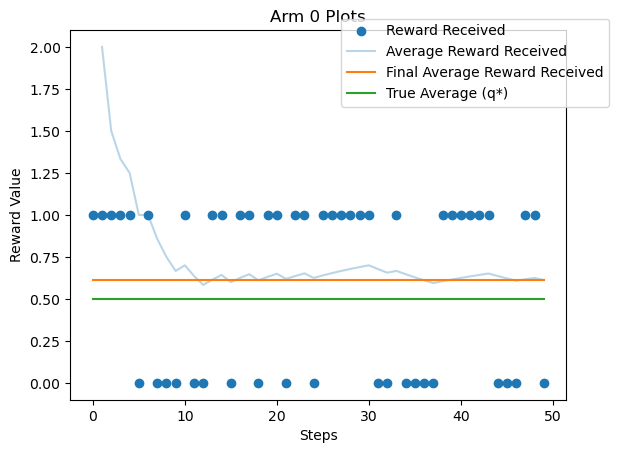

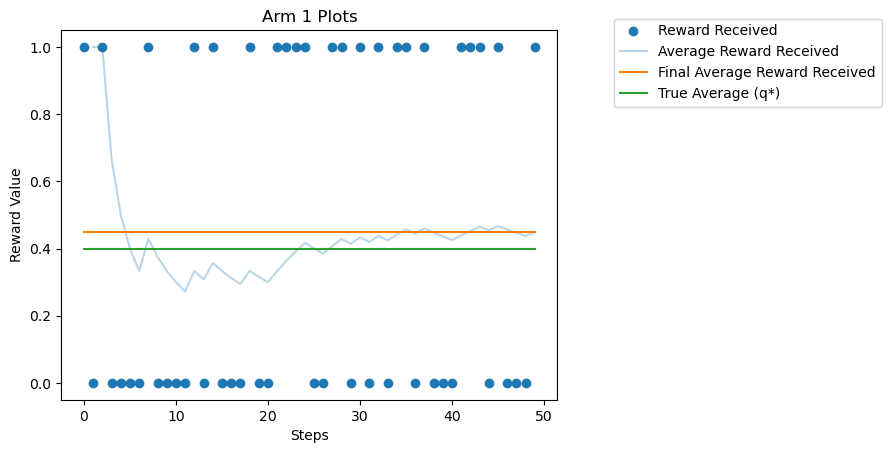

C:\Users\15084\AppData\Local\Temp\ipykernel_36204\500206038.py:20: RuntimeWarning: invalid value encountered in longlong_scalars
  average_return = (data_cum[j])/j


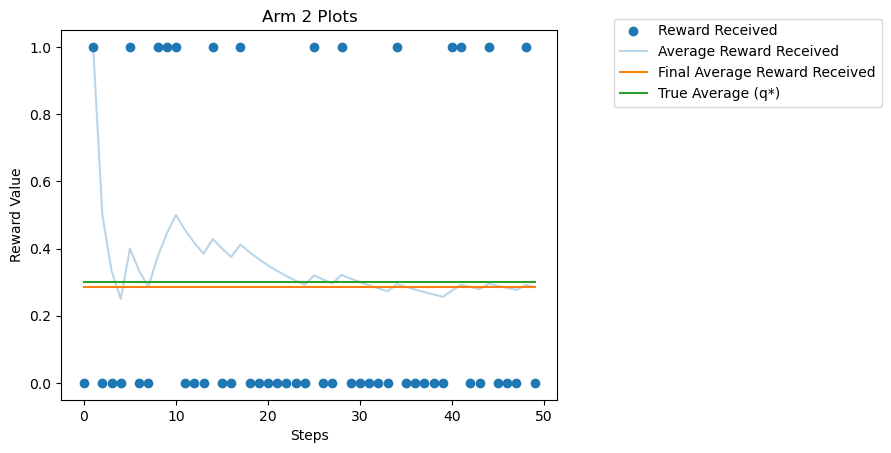

In [3]:
main_p1()

These plots show how as rewards are allocated with the necessarily bernoulli distribution the averaging method allows for the average expected reward to arrive at the true expected average reward.



## Problem 2


In [4]:
#estimated reward update function for the gradient function
def update(alpha,current_estimate,reward):
  return current_estimate + alpha * (reward-current_estimate)

#estimated reward update function for the average function
def updateAvg(alpha,data_cum,steps):
  return ((data_cum)/steps)

#plotting out averaging and gradient plots
def updateAvg_plots(range_vals,data_bern,list_average,true_np,arm_number):
  plt.scatter(range_vals,data_bern, label = "Reward Received") 
  plt.scatter(range_vals,list_average, label = "Average Reward Received")
  plt.scatter(range_vals,true_np, label = "True Reward (q*)")
  
  plt.legend()
  plt.title("Averaging Method Arm " + str(arm_number) + " Plots")
  plt.xlabel("Runs")
  plt.ylabel("Reward Value")
  plt.show()


def update_plots(range_vals,data_bern,list_average1,list_average2,true_np,arm_number,alpha1,alpha2,list_average):
  #plt.scatter(range_vals,data_bern, label = "Reward Received") 
  
  plt.plot(range_vals,list_average, label = "Average Reward")
  plt.plot(range_vals,list_average1, label = "Average Reward Received Alpha == "+str(alpha1))
  plt.plot(range_vals,list_average2, label = "Average Reward Received Alpha == "+str(alpha2))
  plt.plot(range_vals,true_np, label = "True Average (q*)")
  
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.title("Averaging Method Arm " + str(arm_number) + " Plots")
  plt.xlabel("Steps")
  plt.ylabel("Reward Value")
  plt.show()

def main_p2(alpha1,alpha2,trials):
  #rewards at initialization
  proba_values = np.array([0.5,0.4,0.3])
  true_value = np.array([0.5,0.4,0.3])
  trial_number = trials
  range_vals = np.arange(0,trial_number,1)

  for i in range(3):
    list_average = []
    list_update1 = [0]
    list_update2 = [0]

    data_bern = bernoulli.rvs(size=trial_number,p=proba_values[i])
    data_cum = np.cumsum(data_bern)

    #update and append each of the different methods based on it previous estimated reward
    for j in range(trial_number):
      list_average.append(updateAvg(alpha1,data_cum[j],j))
      list_update1.append(update(alpha1,list_update1[j],data_bern[j]))
      list_update2.append(update(alpha2,list_update2[j],data_bern[j]))
    
    #values for the scatter plot x value
    true_np = np.ones(trial_number) * true_value[i]
    #updateAvg_plots(range_vals,data_bern,list_average,true_np,i)
    #plotting
    update_plots(range_vals,data_bern,list_update1[1:],list_update2[1:],true_np,i,alpha1,alpha2,list_average)




C:\Users\15084\AppData\Local\Temp\ipykernel_36204\3331397555.py:7: RuntimeWarning: invalid value encountered in longlong_scalars
  return ((data_cum)/steps)


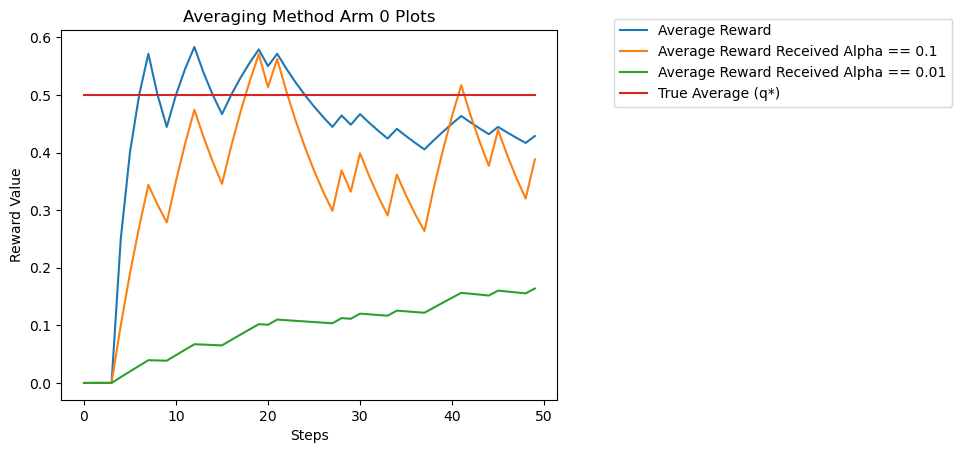

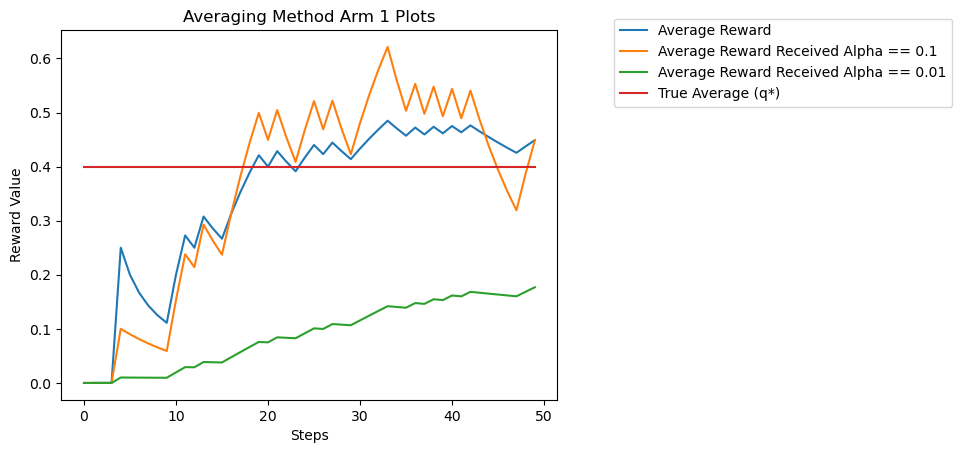

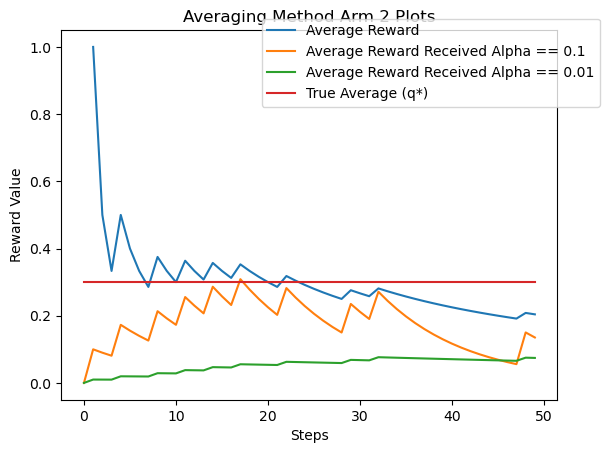

In [5]:
main_p2(0.1,0.01,50)

This plot shows how different methods update the return values at different speeds. The curve with alpha = 0.01 updates the slowest because the step size is the smallest. The difference between alpha = 0.01 and alpha = 0.1 can be seen as the second one updates faster. But since its step size is so large it causes larger variation than the averaging method.

## Problem 3

In [6]:
#update gradient function
def update(alpha,current_estimate,reward):
  return current_estimate + alpha * (reward-current_estimate)

#update averaging function
def updateAvg(alpha,data_cum,steps):
  return ((data_cum)/steps)

#all plots plotting out
def updateAvg_plots(range_vals,data_bern,list_average,true_np,arm_number,run_preaveraged_se):
  #plt.scatter(range_vals,data_bern, label = "Reward Received") 
  plt.plot(range_vals,list_average, label = "Average Reward Received")
  plt.plot(range_vals,true_np, label = "True Received")
  plt.plot(range_vals,run_preaveraged_se, label = "Standard Error")
  
  plt.legend()
  plt.title("100 Run with Averaging Method for Arm " + str(arm_number) + " Plots")
  plt.xlabel("Runs")
  plt.ylabel("Reward Value")
  plt.show()

#plotting just gradients
def update_plots(range_vals,data_bern,list_average1,list_average2,true_np,arm_number,alpha1,alpha2):
  #plt.scatter(range_vals,data_bern, label = "Reward Received") 
  plt.plot(range_vals,list_average1, label = "Average Reward Received Alpha == "+str(alpha1))
  plt.plot(range_vals,list_average2, label = "Average Reward Received Alpha == "+str(alpha2))
  plt.plot(range_vals,true_np, label = "True Received")
  
  plt.legend()
  plt.title("100 Run with Gradient Methods "+str(alpha1) + " and "+ str(alpha2) +" for Arm " + str(arm_number) + " Plots")
  plt.xlabel("Runs")
  plt.ylabel("Reward Value")
  plt.show()

def main_p3(alpha1,alpha2,steps,runs):
  proba_values = np.array([0.5,0.4,0.3])
  true_value = np.array([0.5,0.4,0.3])
  trial_number = steps
  run_number = runs
  range_vals = np.arange(0,trial_number,1)
  run_preaveraged = [0 for x in range(steps)]
  
  #for each of the arm
  for i in range(3):
    #standard error recording for each of the different methods
    run_preaveraged_se = [0 for x in range(steps)]
    run_preaveraged_se1 = [0 for x in range(steps)]
    run_preaveraged_se2 = [0 for x in range(steps)]
    
    
    #average storage for each of the different methods
    #the estimated values are added for each run and then averaged at the end before being plotted
    run_preaveraged_avg = [0 for x in range(steps)]
    run_preaveraged_alpha1 = [0 for x in range(steps)]
    run_preaveraged_alpha2 = [0 for x in range(steps)]

    #for each of the runs


    for k in range(run_number):


      list_average = []
      list_update1 = [0]
      list_update2 = [0]
      data_bern = bernoulli.rvs(size=trial_number,p=proba_values[i])
      data_cum = np.cumsum(data_bern)

      #for each of the steps
      for j in range(trial_number):
        #averaging method
        val_average = updateAvg(alpha1,data_cum[j],j+1) #get new update based on reward (based on current reward estimate)
        list_average.append(val_average) #store new updated value
        run_preaveraged_avg[j] += val_average #add the new estimate into the run pool
        run_preaveraged_se[j] += (abs(true_value[i] - val_average)) #for standard error
        
        #gradient alpha = 0.1 (each line for same use as average section)
        run_preaveraged_se1[j] += (abs(true_value[i] - list_update1[-1])) #for standard error
        val_alpha1 = update(alpha1,list_update1[-1],data_bern[j])
        list_update1.append(val_alpha1)
        run_preaveraged_alpha1[j] += val_alpha1
        

        #gradient alpha = 0.01 (each line for same use as average section)
        run_preaveraged_se2[j] += (abs(true_value[i] - list_update2[-1])) #for standard error
        val_alpha2 = update(alpha2,list_update2[-1],data_bern[j])
        list_update2.append(val_alpha2)
        run_preaveraged_alpha2[j] += val_alpha2
        
      #print(run_preaveraged_se)
      #standard error calculation
      #run_preaveraged_se[k] = stats.sem(val, axis=None, ddof=0)
      #run_preaveraged_se1[k] = stats.sem(val1, axis=None, ddof=0)
      #run_preaveraged_se2[k] = stats.sem(val2, axis=None, ddof=0)
      true_np = np.ones(trial_number) * true_value[i]

    #average the rewards at each time step for the number of runs
    for itter in range(trial_number):
      run_preaveraged_avg[itter] = run_preaveraged_avg[itter]/run_number
      run_preaveraged_se[itter] = run_preaveraged_se[itter]/run_number
      run_preaveraged_se1[itter] = run_preaveraged_se1[itter]/run_number#-0.05
      run_preaveraged_se2[itter] = run_preaveraged_se2[itter]/run_number
    for itter in range(trial_number):
      run_preaveraged_alpha1[itter] = run_preaveraged_alpha1[itter]/run_number
      run_preaveraged_alpha2[itter] = run_preaveraged_alpha2[itter]/run_number
    #print(run_preaveraged_se)
    
    plt.plot(range_vals,run_preaveraged_avg, label = "Average Reward Received")
    
    plt.plot(range_vals,run_preaveraged_alpha1, label = "Average Reward Received Alpha == "+str(alpha1))
    plt.plot(range_vals,run_preaveraged_alpha2, label = "Average Reward Received Alpha == "+str(alpha2))
    plt.plot(range_vals,true_np, label = "True Average (q*)")
    plt.plot(range_vals,run_preaveraged_se, label = "Standard Error Averaging Method")
    plt.plot(range_vals,run_preaveraged_se1, label = "Standard Error Alpha == "+str(alpha1))
    plt.plot(range_vals,run_preaveraged_se2, label = "Standard Error Alpha == "+str(alpha2))
    
  
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.title("Average Rewards and Standard Errors")
    plt.xlabel("Steps (averaged over 100 runs)")
    plt.ylabel("Reward Value")
    plt.show()



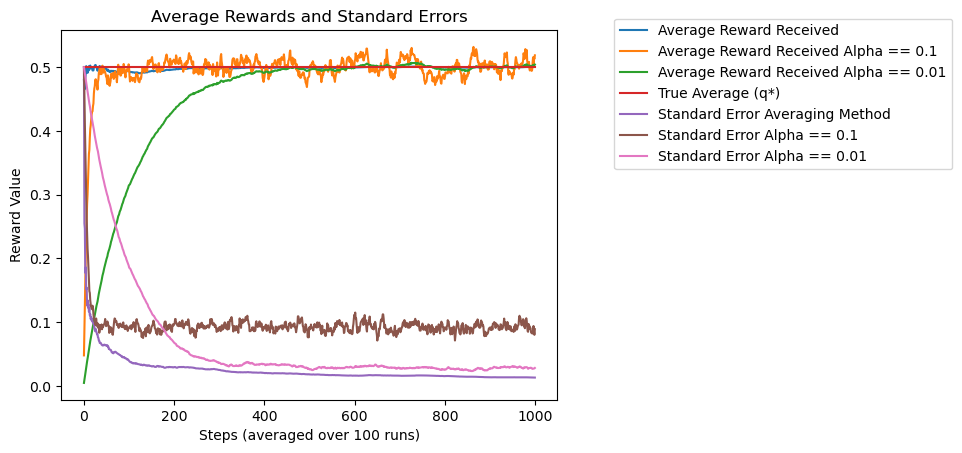

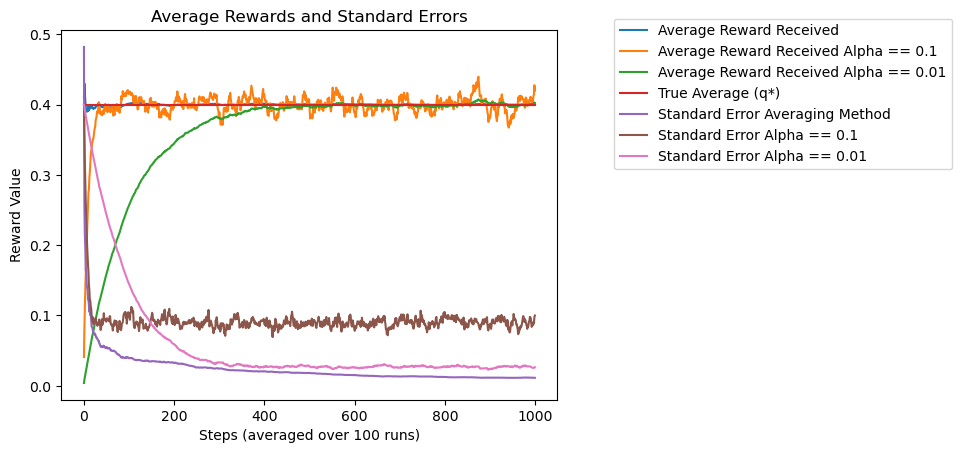

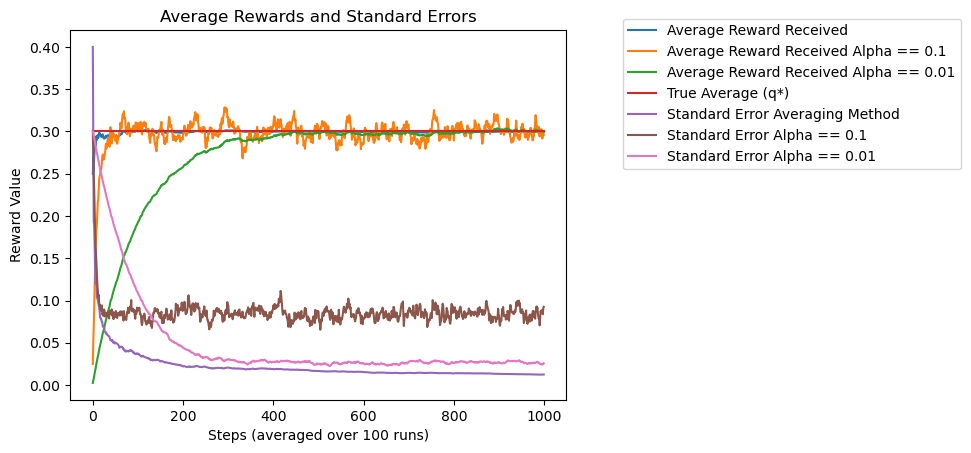

In [7]:
main_p3(0.1,0.01,1000,100)

This data across three arms show how alpha == 0.1 is a faster method than with alpha of 0.01 to get to close to the true received value for each arm. But it has too much variance. Alpha == 0.01 value has a lower variation  but takes a lot of steps to arrive to the true expected return. Since the averaging increases fastests and then its "step" slows down it has much lower variation towards the end. This makes the averaging method best. A gradient method who's alpha slowly decreases overtime might be better than averaging but it was not tested in this assignment.


## Problem 4

In [8]:
#returns max value. Random if max value is not unique. (randomly picks between max values based on a uniform distribution)
def maxpos(return_list):
  pos = [index for index, item in enumerate(return_list) if item == max(return_list)]
  if len(pos) > 1:
    rand = random.randint(0, len(pos))
    return pos[rand-1]
  else:
    return pos[0]

#update reward from gradient method
def update(alpha,current_estimate,reward):
  return current_estimate + alpha * (reward-current_estimate)

#update4 reward for average method
def updateAvg(alpha,data_cum,steps):
  return ((data_cum)/steps)

def main_p4(alpha,trials,multi,epsilon):

  #accumulation of data for the plots
  run_preaveraged_reward = [0 for x in range(trials)]
  run_preaveraged_best = [0 for x in range(trials)]
  
  run_preaveraged_instant_regret = [0 for x in range(trials)]
  run_preaveraged_total_regret = [0 for x in range(trials)]

  #true rewards
  proba_values = np.array([0.5,0.4,0.3])
  true_value = np.array([0.5,0.4,0.3])
  trial_number = trials
  range_vals = np.arange(0,trial_number,1)
  multi_range_vals = np.arange(0,multi,1)

  #collecting value in each run
  total_average = [[],[],[]]
  total_update = [[],[],[]]
  
  run_preaveraged_se = [0 for x in range(trials)]
  for k in range(multi):
    val = []
    end_reward = 0
    list_average = [[0],[0],[0]]
    list_update = [[0],[0],[0]]
    average_error = [[],[],[]]
    update_error = [[],[],[]]

    average_use = [[0],[0],[0]]


    for j in range(trial_number):
      rand = random.uniform(0,1)
      current_best = maxpos([list_average[0][-1],list_average[1][-1],list_average[2][-1]])
      # best value for optimization calculation
      if current_best == 0:
        run_preaveraged_best[j] += 1
      if rand < epsilon:
        avgpick = random.randint(0, 3)
      else:
        avgpick = maxpos([list_average[0][-1],list_average[1][-1],list_average[2][-1]])
      for l in range(3):
        if l == avgpick:
          #usage incrementation (for denominator in average)
          average_use[avgpick][0] += 1
          #random value generation
          data_bern = bernoulli.rvs(size=1,p=proba_values[avgpick])
          
          run_preaveraged_reward[j]+= data_bern[0]
          #get new average reward
          returned = (updateAvg(alpha,(average_use[avgpick][0]-1)*list_average[avgpick][-1]+ data_bern[0],average_use[avgpick][0]))
          val.append(returned)
          list_average[l].append(returned)
          run_preaveraged_se[j] += (abs(true_value[avgpick] - returned)) #for standard error

          run_preaveraged_instant_regret[j] += true_value[0] - true_value[l]
          
        else:
          list_average[l].append(list_average[l][-1])


  #processing of average, optimal best, instant regret, total regret values
  for itter in range(trial_number):
    run_preaveraged_reward[itter] = run_preaveraged_reward[itter]/multi
    run_preaveraged_se[itter] = run_preaveraged_se[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_best[itter] = run_preaveraged_best[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_instant_regret[itter] = run_preaveraged_instant_regret[itter]/multi

  #total regret is accumulation of instant regrets
  for itter in range(trial_number):
    if itter == 0:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter]
    else:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter] + run_preaveraged_total_regret[itter-1]

  return [run_preaveraged_reward,run_preaveraged_best,run_preaveraged_instant_regret,run_preaveraged_total_regret,run_preaveraged_se]

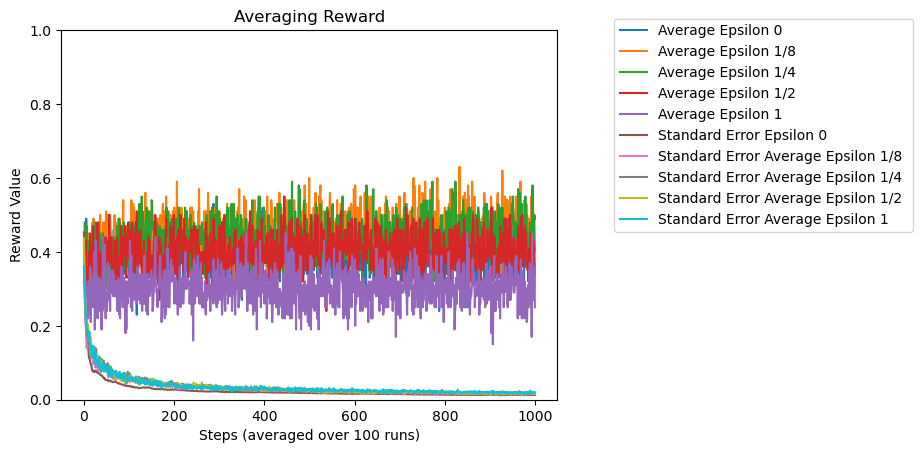

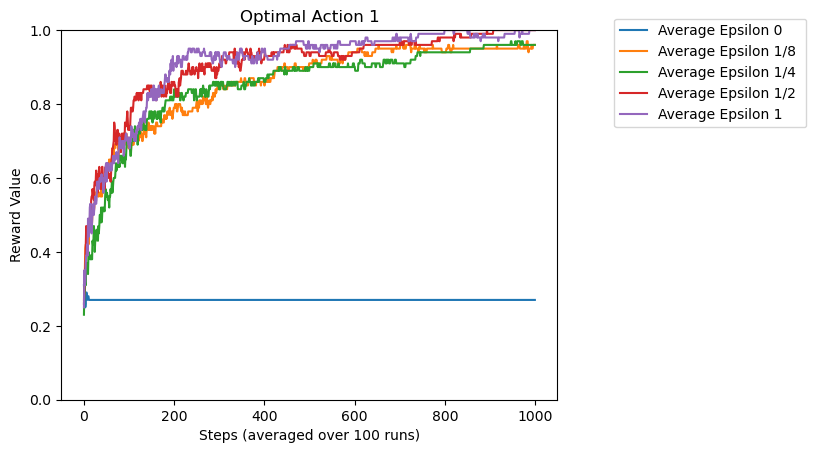

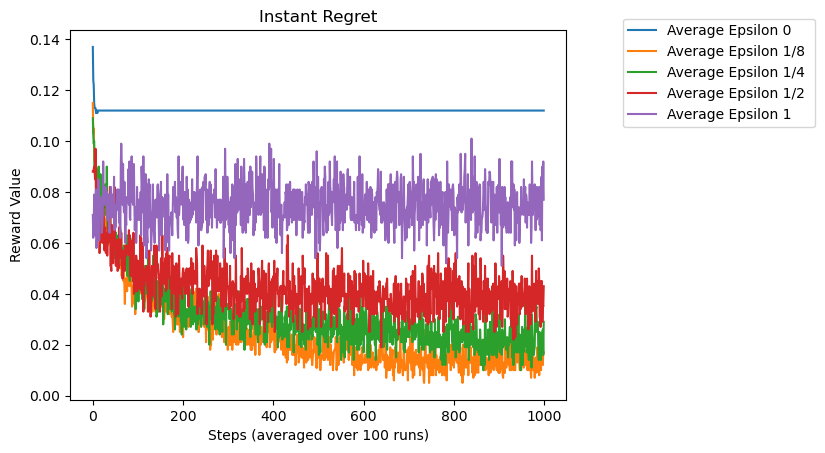

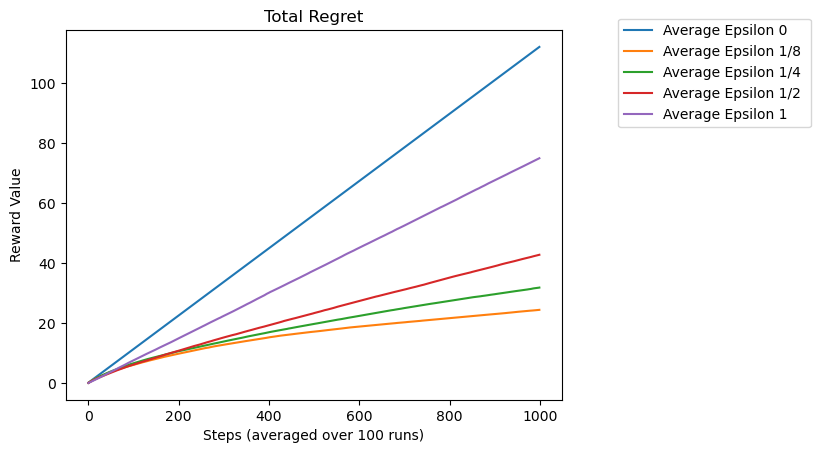

In [9]:
#runs of main for each value of epsilon reward
zero = main_p4(0.1,1000,100,0)

one_eight = main_p4(0.1,1000,100,1/8)

one_four = main_p4(0.1,1000,100,1/4)

one_two = main_p4(0.1,1000,100,1/2)

one = main_p4(0.1,1000,100,1)

#average reward and standard error plots
range_vals = np.arange(0,1000,1)
plt.plot(range_vals,zero[0], label = "Average Epsilon 0 ") 
plt.plot(range_vals,one_eight[0], label = "Average Epsilon 1/8 ") 
plt.plot(range_vals,one_four[0], label = "Average Epsilon 1/4 ") 
plt.plot(range_vals,one_two[0], label = "Average Epsilon 1/2 ") 
plt.plot(range_vals,one[0], label = "Average Epsilon 1 ") 

plt.plot(range_vals,zero[4], label = "Standard Error Epsilon 0 ") 
plt.plot(range_vals,one_eight[4], label = "Standard Error Average Epsilon 1/8 ") 
plt.plot(range_vals,one_four[4], label = "Standard Error Average Epsilon 1/4 ") 
plt.plot(range_vals,one_two[4], label = "Standard Error Average Epsilon 1/2 ") 
plt.plot(range_vals,one[4], label = "Standard Error Average Epsilon 1 ") 

plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Averaging Reward")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

#Optimal action based on estimated value
plt.plot(range_vals,zero[1], label = "Average Epsilon 0 ") 
plt.plot(range_vals,one_eight[1], label = "Average Epsilon 1/8 ") 
plt.plot(range_vals,one_four[1], label = "Average Epsilon 1/4 ") 
plt.plot(range_vals,one_two[1], label = "Average Epsilon 1/2 ") 
plt.plot(range_vals,one[1], label = "Average Epsilon 1 ") 

plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Optimal Action 1")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

#Instant regret
plt.plot(range_vals,zero[2], label = "Average Epsilon 0 ") 
plt.plot(range_vals,one_eight[2], label = "Average Epsilon 1/8 ") 
plt.plot(range_vals,one_four[2], label = "Average Epsilon 1/4 ") 
plt.plot(range_vals,one_two[2], label = "Average Epsilon 1/2 ") 
plt.plot(range_vals,one[2], label = "Average Epsilon 1 ") 

#plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Instant Regret")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

#Total regret
plt.plot(range_vals,zero[3], label = "Average Epsilon 0 ") 
plt.plot(range_vals,one_eight[3], label = "Average Epsilon 1/8 ") 
plt.plot(range_vals,one_four[3], label = "Average Epsilon 1/4 ") 
plt.plot(range_vals,one_two[3], label = "Average Epsilon 1/2 ") 
plt.plot(range_vals,one[3], label = "Average Epsilon 1 ") 

#plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Total Regret")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

4a plot Average Reward: 
This plot shows the average reward for each of the different methods. Generally the higher the guess the lower the average reward. This is because higher guesses decrease the number of actions which are the estimated optimal. But in the case with no exploration (e = 0) the reward is constantly based on the same arm. This plot also contains the standard error plot. This is based on the equation: STD/sqrt(number of runs)(STD of run n's step in all 100 runs)

4b plot estimated action: This plot shows the estimate for which arm would give the highest reward. This is not based on which arm was selected by a random action (from epsilon). This method takes the arm with the highest estimated reward at each time step. If the optimal action was based on the action taken each arm would have a max higher bounds based on the epsilon. This means on average the max percent of optimal actions for each arm is 100 - 2/3*epsilon. (the factor of 2/3 is there because in a random guess the arm can still guess the optimal arm (since 2 of the 3 arms are non optimal the factor is 2/3)


4c Instant regret plot: This shows the difference between the true expectation of the optimal reward - the true expectation of the action taken

4d Total regret plot: This shows the accumulation of the instant regret

## Problem 5

In [10]:
#returns max value. Random if max value is not unique. (randomly picks between max values based on a uniform distribution)
def maxpos(return_list):
  pos = [index for index, item in enumerate(return_list) if item == max(return_list)]
  if len(pos) > 1:
    rand = random.randint(0, len(pos))
    return pos[rand-1]
  else:
    return pos[0]

#update reward from gradient method
def update(alpha,current_estimate,reward):
  return current_estimate + alpha * (reward-current_estimate)

#update4 reward for average method
def updateAvg(alpha,data_cum,steps):
  return ((data_cum)/steps)

def main_5(alpha,trials,multi,epsilon,toggle):
  
  run_preaveraged_reward = [0 for x in range(trials)] #reward at each time step
  run_preaveraged_best = [0 for x in range(trials)] #best action at each step
  
  run_preaveraged_instant_regret = [0 for x in range(trials)] #instant regret calculation at each step
  run_preaveraged_total_regret = [0 for x in range(trials)] #effectively accumulation of instant regret
  
  proba_values = np.array([0.5,0.4,0.3])
  true_value = np.array([0.5,0.4,0.3])
  trial_number = trials
  range_vals = np.arange(0,trial_number+1,1)
  multi_range_vals = np.arange(0,multi,1)
  total_average_error = [[],[],[]]
  total_update_error = [[],[],[]]
  total_average = [[],[],[]]
  total_update = [[],[],[]]
  total_reward = []

  avg_inst_regret = []
  avg_total_regret = []
  run_preaveraged_se = [0 for x in range(trials)]

  #for each run
  for k in range(multi):
    val = []
    end_reward = 0

    #stored values refresh on each run
    list_average = [[0],[0],[0]]
    list_update = [[0],[0],[0]]
    average_error = [[],[],[]]
    update_error = [[],[],[]]

    average_use = [[0],[0],[0]]
    update_use = [[0],[0],[0]]

    instant_regret = 0

    success_history = [[],[],[]]


    #for each step
    for j in range(trial_number):
      rand = random.uniform(0,1)
      #averaging method
      if toggle == 0:
        
        tmppick = maxpos([list_average[0][-1],list_average[1][-1],list_average[2][-1]])

        if tmppick == 0:
          run_preaveraged_best[j] += 1
        if rand < epsilon:
          avgpick = random.randint(0, 3)
        else:
          avgpick = maxpos([list_average[0][-1],list_average[1][-1],list_average[2][-1]])
        
        #check each arm
        for l in range(3):
          if l == avgpick:
            average_use[avgpick][0] += 1 
            data_bern = bernoulli.rvs(size=1,p=proba_values[avgpick])
            end_reward += data_bern[0]
            returned = (updateAvg(alpha,(average_use[avgpick][0]-1)*list_average[avgpick][-1]+ data_bern[0],average_use[avgpick][0]))
            val.append(returned)
          
            list_average[l].append(returned)
            instant_regret += true_value[0] - true_value[l]

            run_preaveraged_instant_regret[j] += true_value[0] - true_value[l]
            run_preaveraged_reward[j] += data_bern[0]
            run_preaveraged_se[j] += (abs(true_value[avgpick] - returned)) #for standard error
          else:
            list_average[l].append(list_average[l][-1])
        
        if j == trial_number - 1:
          avg_inst_regret.append(instant_regret/trial_number)
          avg_total_regret.append(instant_regret)
          total_average[0].append(list_average[0][-1])
          total_average[1].append(list_average[1][-1])
          total_average[2].append(list_average[2][-1])
      
      #gradient descent methodd
      elif toggle == 1:
        tmppick = maxpos([list_update[0][-1],list_update[1][-1],list_update[2][-1]])
        if tmppick == 0:
          run_preaveraged_best[j] += 1
        if rand < epsilon:
          avgpick = random.randint(0, 3)
        else:
          avgpick = maxpos([list_update[0][-1],list_update[1][-1],list_update[2][-1]])
        for l in range(3):
          if l == avgpick:
            average_use[avgpick][0] += 1
            data_bern = bernoulli.rvs(size=1,p=proba_values[avgpick])
            #update(alpha,current_estimate,reward):
            returned = update(alpha,list_update[avgpick][-1],data_bern[0])
            val.append(returned)
          
            list_update[l].append(returned)
            end_reward += data_bern[0]
            instant_regret += true_value[0] - true_value[l]
            success_history[l].append(data_bern[0])
            run_preaveraged_se[j] += (abs(true_value[avgpick] - returned)) #for standard error
            run_preaveraged_instant_regret[j] += true_value[0] - true_value[l]

            run_preaveraged_reward[j] += data_bern[0]
          else:
            list_update[l].append(list_update[l][-1])
        if j == trial_number - 1:
          avg_inst_regret.append(instant_regret/trial_number)
          avg_total_regret.append(instant_regret)
          total_average[0].append(list_update[0][-1])
          total_average[1].append(list_update[1][-1])
          total_average[2].append(list_update[2][-1])
          total_reward.append(end_reward/trial_number)
  
  #post precessing all data by dividing by number of trials
  for itter in range(trial_number):
    run_preaveraged_reward[itter] = run_preaveraged_reward[itter]/multi
    run_preaveraged_se[itter] = run_preaveraged_se[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_best[itter] = run_preaveraged_best[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_instant_regret[itter] = run_preaveraged_instant_regret[itter]/multi

  for itter in range(trial_number):
    if itter == 0:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter]
    else:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter] + run_preaveraged_total_regret[itter-1]

  #returns data
  return [run_preaveraged_reward,run_preaveraged_best,run_preaveraged_instant_regret,run_preaveraged_total_regret,run_preaveraged_se]


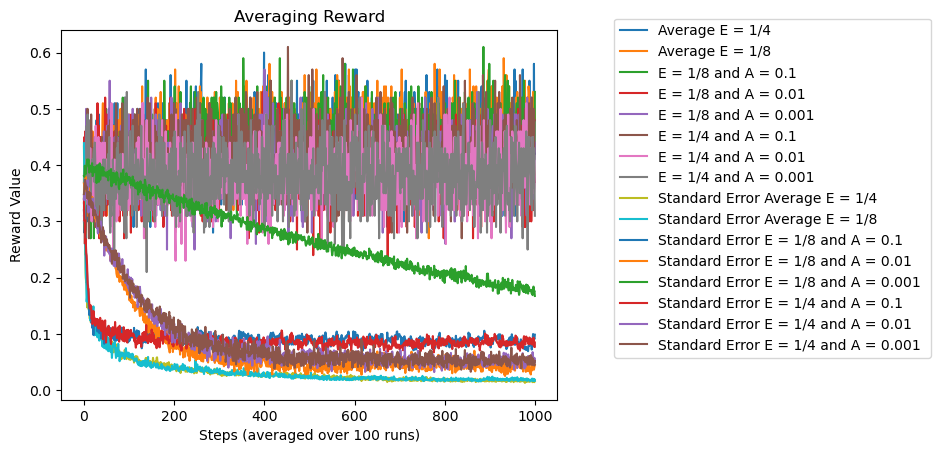

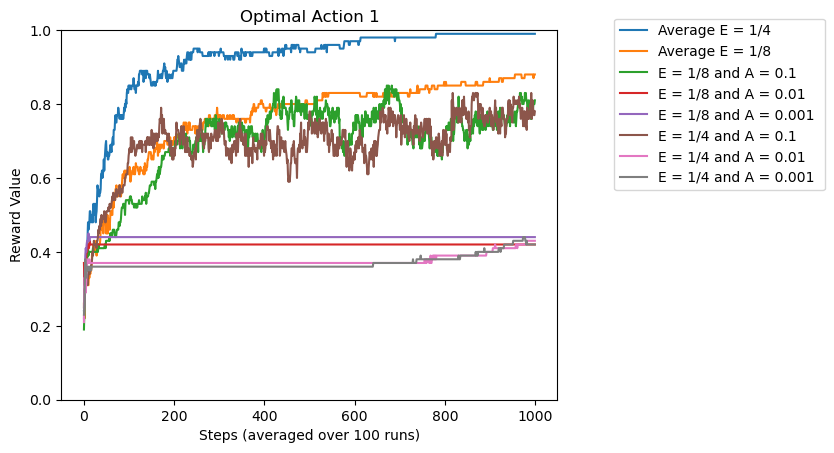

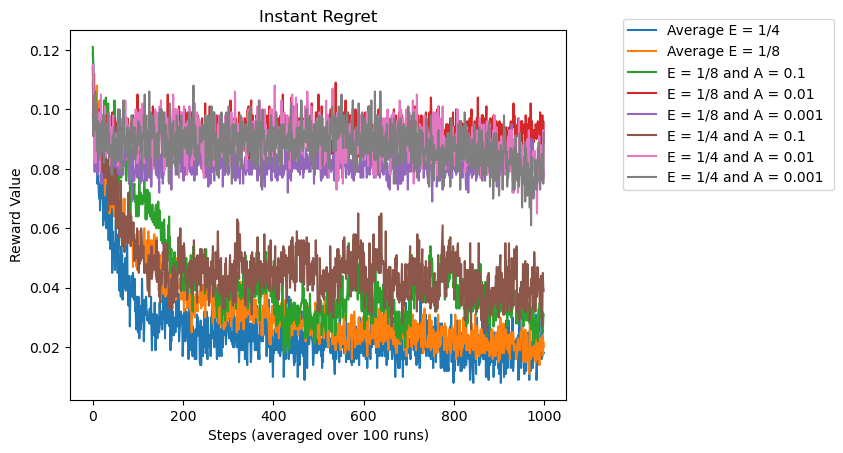

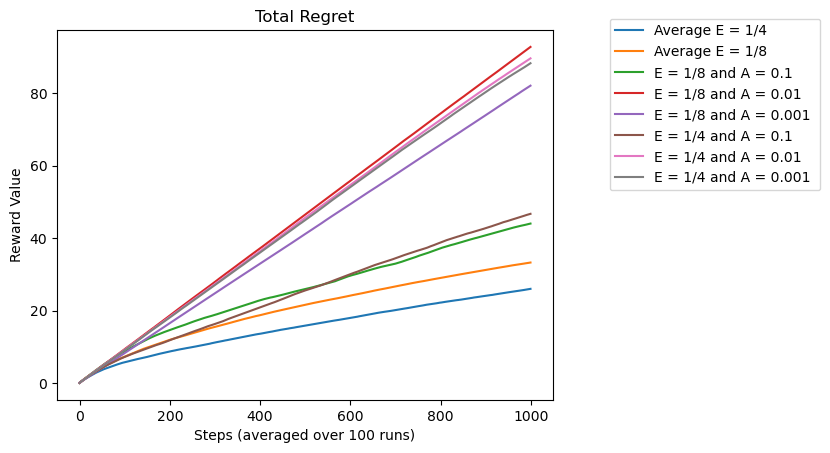

In [11]:
one_eight = main_5(0.1,1000,100,1/8,0)

one_eight_alpha_1 = main_5(0.1,1000,100,1/8,1)

one_eight_alpha_2 = main_5(0.01,1000,100,1/8,1)

one_eight_alpha_3 = main_5(0.001,1000,100,1/8,1)

one_four = main_5(0.1,1000,100,1/4,0)

one_four_alpha_1 = main_5(0.1,1000,100,1/4,1)

one_four_alpha_2 = main_5(0.01,1000,100,1/4,1)

one_four_alpha_3 = main_5(0.01,1000,100,1/4,1)

average = main_5(0.01,1000,100,1/4,0)


range_vals = np.arange(0,1000,1)
plt.plot(range_vals,one_four[0], label = "Average E = 1/4")
plt.plot(range_vals,one_eight[0], label = "Average E = 1/8") 
plt.plot(range_vals,one_eight_alpha_1[0], label = "E = 1/8 and A = 0.1 ") 
plt.plot(range_vals,one_eight_alpha_2[0], label = "E = 1/8 and A = 0.01 ")
plt.plot(range_vals,one_eight_alpha_3[0], label = "E = 1/8 and A = 0.001 ")
plt.plot(range_vals,one_four_alpha_1[0], label = "E = 1/4 and A = 0.1 ")
plt.plot(range_vals,one_four_alpha_2[0], label = "E = 1/4 and A = 0.01 ")
plt.plot(range_vals,one_four_alpha_3[0], label = "E = 1/4 and A = 0.001 ")

plt.plot(range_vals,one_four[4], label = "Standard Error Average E = 1/4")
plt.plot(range_vals,one_eight[4], label = "Standard Error Average E = 1/8") 
plt.plot(range_vals,one_eight_alpha_1[4], label = "Standard Error E = 1/8 and A = 0.1 ") 
plt.plot(range_vals,one_eight_alpha_2[4], label = "Standard Error E = 1/8 and A = 0.01 ")
plt.plot(range_vals,one_eight_alpha_3[4], label = "Standard Error E = 1/8 and A = 0.001 ")
plt.plot(range_vals,one_four_alpha_1[4], label = "Standard Error E = 1/4 and A = 0.1 ")
plt.plot(range_vals,one_four_alpha_2[4], label = "Standard Error E = 1/4 and A = 0.01 ")
plt.plot(range_vals,one_four_alpha_3[4], label = "Standard Error E = 1/4 and A = 0.001 ")

#plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Averaging Reward")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

plt.plot(range_vals,one_four[1], label = "Average E = 1/4")
plt.plot(range_vals,one_eight[1], label = "Average E = 1/8") 
plt.plot(range_vals,one_eight_alpha_1[1], label = "E = 1/8 and A = 0.1 ") 
plt.plot(range_vals,one_eight_alpha_2[1], label = "E = 1/8 and A = 0.01 ")
plt.plot(range_vals,one_eight_alpha_3[1], label = "E = 1/8 and A = 0.001 ")
plt.plot(range_vals,one_four_alpha_1[1], label = "E = 1/4 and A = 0.1 ")
plt.plot(range_vals,one_four_alpha_2[1], label = "E = 1/4 and A = 0.01 ")
plt.plot(range_vals,one_four_alpha_3[1], label = "E = 1/4 and A = 0.001 ")

plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Optimal Action 1")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

plt.plot(range_vals,one_four[2], label = "Average E = 1/4")
plt.plot(range_vals,one_eight[2], label = "Average E = 1/8") 
plt.plot(range_vals,one_eight_alpha_1[2], label = "E = 1/8 and A = 0.1 ") 
plt.plot(range_vals,one_eight_alpha_2[2], label = "E = 1/8 and A = 0.01 ")
plt.plot(range_vals,one_eight_alpha_3[2], label = "E = 1/8 and A = 0.001 ")
plt.plot(range_vals,one_four_alpha_1[2], label = "E = 1/4 and A = 0.1 ")
plt.plot(range_vals,one_four_alpha_2[2], label = "E = 1/4 and A = 0.01 ")
plt.plot(range_vals,one_four_alpha_3[2], label = "E = 1/4 and A = 0.001 ")

#plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Instant Regret")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

plt.plot(range_vals,one_four[3], label = "Average E = 1/4")
plt.plot(range_vals,one_eight[3], label = "Average E = 1/8") 
plt.plot(range_vals,one_eight_alpha_1[3], label = "E = 1/8 and A = 0.1 ") 
plt.plot(range_vals,one_eight_alpha_2[3], label = "E = 1/8 and A = 0.01 ")
plt.plot(range_vals,one_eight_alpha_3[3], label = "E = 1/8 and A = 0.001 ")
plt.plot(range_vals,one_four_alpha_1[3], label = "E = 1/4 and A = 0.1 ")
plt.plot(range_vals,one_four_alpha_2[3], label = "E = 1/4 and A = 0.01 ")
plt.plot(range_vals,one_four_alpha_3[3], label = "E = 1/4 and A = 0.001 ")

#plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Total Regret")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

These plots show in general the Averaging method seen in problem 4 is superior in of optimal action and regret. Across the gradient methods the cases with the higher epsilon and alpha increase faster to the average value. The cases with alpha 0.01 and 0.001 with epsilon 1/8 does not seem to grow much but after 1000 steps. It just requires a lot more actions rising to the optimal action constantly. This effectively means that even if the step size is really small the exploration should be increased to allow for faster updating.

Regret plot interesting finds:

Since with gradient desent with epsilon = 1/8 and alphas 0.01 and 0.001 the exploration is super lower and the editing of the estimated value grows very little aswell. This causes the values to have near linear regret. If the trials are extended to 10,000 the regret starts to more visibly deviated from linear.

## Problem 6

In [12]:
def UCB_method(estimate,usage,constant,size):
  currentmax = 0
  maxpos = 0
  total_usage = np.sum(usage)
  for i in range(size):
    current = estimate[i]+constant*math.sqrt(math.log(total_usage+1)/(usage[i]+0.0000001))
    if current > currentmax:
      maxpos = i
      currentmax = current
    elif current == currentmax:
      rand = random.randint(0,1)
      if rand == 1:
        maxpos = i
        currentmax = current
  return maxpos

def maxpos(return_list):
  pos = [index for index, item in enumerate(return_list) if item == max(return_list)]
  if len(pos) > 1:
    rand = random.randint(0, len(pos))
    return pos[rand-1]
  else:
    return pos[0]

def update(alpha,current_estimate,reward):
  return current_estimate + alpha * (reward-current_estimate)

def updateAvg(alpha,data_cum,steps):
  return ((data_cum)/steps)

def updateAvg_plots(range_vals,data_bern,list_average,true_np,arm_number,error):
  plt.scatter(range_vals,data_bern, label = "Reward Received") 
  plt.scatter(range_vals,list_average, label = "Average Reward Received")
  plt.scatter(range_vals,true_np, label = "True Received")
  plt.scatter(range_vals,error, label = "Error")
  
  plt.legend()
  plt.title("Averaging Method Arm " + str(arm_number) + " Plots")
  plt.xlabel("Runs")
  plt.ylabel("Reward Value")
  plt.show()

def update_plots(range_vals,data_bern,list_average,true_np,arm_number,error):
  plt.scatter(range_vals,data_bern, label = "Reward Received") 
  plt.scatter(range_vals,list_average, label = "Average Reward Received")
  plt.scatter(range_vals,true_np, label = "True Received")
  plt.scatter(range_vals,error, label = "Error")
  
  plt.legend()
  plt.title("Alpha Method Arm " + str(arm_number) + " Plots")
  plt.xlabel("Runs")
  plt.ylabel("Reward Value")
  plt.show()

def main(alpha,trials,multi,epsilon,toggle):
  
  run_preaveraged_reward = [0 for x in range(trials)]
  run_preaveraged_best = [0 for x in range(trials)]
  
  run_preaveraged_instant_regret = [0 for x in range(trials)]
  run_preaveraged_total_regret = [0 for x in range(trials)]
  
  proba_values = np.array([0.5,0.4,0.3])
  true_value = np.array([0.5,0.4,0.3])
  trial_number = trials
  range_vals = np.arange(0,trial_number+1,1)
  multi_range_vals = np.arange(0,multi,1)
  total_average_error = [[],[],[]]
  total_update_error = [[],[],[]]
  total_average = [[],[],[]]
  total_update = [[],[],[]]
  total_reward = []

  avg_inst_regret = []
  avg_total_regret = []
  run_preaveraged_se = [0 for x in range(trials)]
  for k in range(multi):
    val = []
    end_reward = 0
  
    list_average = [[0],[0],[0]]
    list_update = [[0],[0],[0]]
    average_error = [[],[],[]]
    update_error = [[],[],[]]

    average_use = [[0],[0],[0]]
    update_use = [[0],[0],[0]]

    instant_regret = 0

    success_history = [[],[],[]]


    for j in range(trial_number):
      rand = random.uniform(0,1)
      if toggle == 0:
        
        tmppick = maxpos([list_average[0][-1],list_average[1][-1],list_average[2][-1]])
        if tmppick == 0:
          run_preaveraged_best[j] += 1
        avgpick = UCB_method([list_average[0][-1],list_average[1][-1],list_average[2][-1]],[average_use[0][-1],average_use[1][-1],average_use[2][-1]],2,3)
        #print("output: ",avgpick)
        
        #UCB_method(estimate,usage,constant,size):
        for l in range(3):
          if l == avgpick:
            average_use[avgpick][0] += 1
            data_bern = bernoulli.rvs(size=1,p=proba_values[avgpick])
            end_reward += data_bern[0]
            returned = (updateAvg(alpha,(average_use[avgpick][0]-1)*list_average[avgpick][-1]+ data_bern[0],average_use[avgpick][0]))
            list_average[l].append(returned)
            instant_regret += true_value[0] - true_value[l]
            val.append(returned)
            run_preaveraged_se[j] += (abs(true_value[avgpick] - returned)) #for standard error
            run_preaveraged_instant_regret[j] += true_value[0] - true_value[l]
            run_preaveraged_reward[j] += data_bern[0]
          else:
            list_average[l].append(list_average[l][-1])
        
        if j == trial_number - 1:
          
          #run_preaveraged_se[k] = stats.sem(val, axis=None, ddof=0)
          avg_inst_regret.append(instant_regret/trial_number)
          avg_total_regret.append(instant_regret)
          total_average[0].append(list_average[0][-1])
          total_average[1].append(list_average[1][-1])
          total_average[2].append(list_average[2][-1])
        #print("average: ",[list_average[0][-1],list_average[1][-1],list_average[2][-1]])
      
      elif toggle == 1:
        tmppick = maxpos([list_update[0][-1],list_update[1][-1],list_update[2][-1]])
        if tmppick == 0:
          run_preaveraged_best[j] += 1
        avgpick = UCB_method([list_update[0][-1],list_update[1][-1],list_update[2][-1]],[average_use[0][-1],average_use[1][-1],average_use[2][-1]],2,3)
        
        for l in range(3):
          if l == avgpick:
            average_use[avgpick][0] += 1
            data_bern = bernoulli.rvs(size=1,p=proba_values[avgpick])
            #update(alpha,current_estimate,reward):
            returned = update(alpha,list_update[avgpick][-1],data_bern[0])
            list_update[l].append(returned)
            end_reward += data_bern[0]
            instant_regret += true_value[0] - true_value[l]
            success_history[l].append(data_bern[0])
            
            run_preaveraged_instant_regret[j] += true_value[0] - true_value[l]
            run_preaveraged_se[j] += (abs(true_value[avgpick] - returned)) #for standard error
            run_preaveraged_reward[j] += data_bern[0]
            val.append(returned)
          else:
            list_update[l].append(list_update[l][-1])
        if j == trial_number - 1:
          #run_preaveraged_se[k] = stats.sem(val, axis=None, ddof=0)
          avg_inst_regret.append(instant_regret/trial_number)
          avg_total_regret.append(instant_regret)
          total_average[0].append(list_update[0][-1])
          total_average[1].append(list_update[1][-1])
          total_average[2].append(list_update[2][-1])
          total_reward.append(end_reward/trial_number)

  for itter in range(trial_number):
    run_preaveraged_reward[itter] = run_preaveraged_reward[itter]/multi
    run_preaveraged_se[itter] = run_preaveraged_se[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_best[itter] = run_preaveraged_best[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_instant_regret[itter] = run_preaveraged_instant_regret[itter]/multi

  for itter in range(trial_number):
    if itter == 0:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter]
    else:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter] + run_preaveraged_total_regret[itter-1]


  return [run_preaveraged_reward,run_preaveraged_best,run_preaveraged_instant_regret,run_preaveraged_total_regret,run_preaveraged_se]




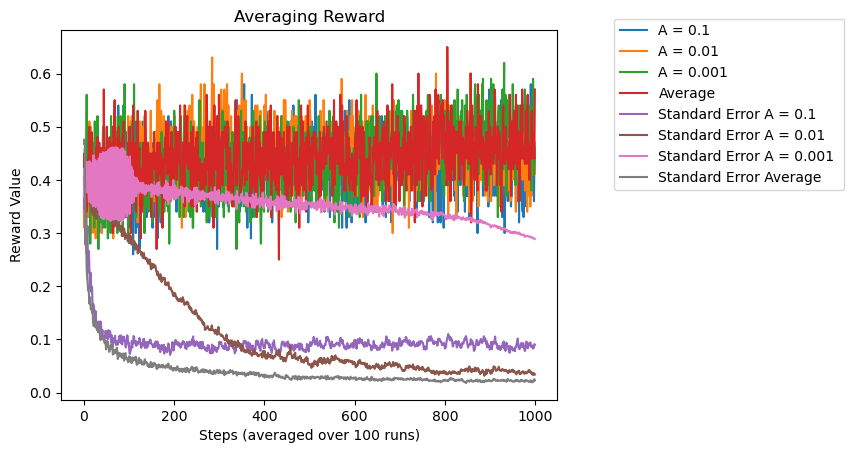

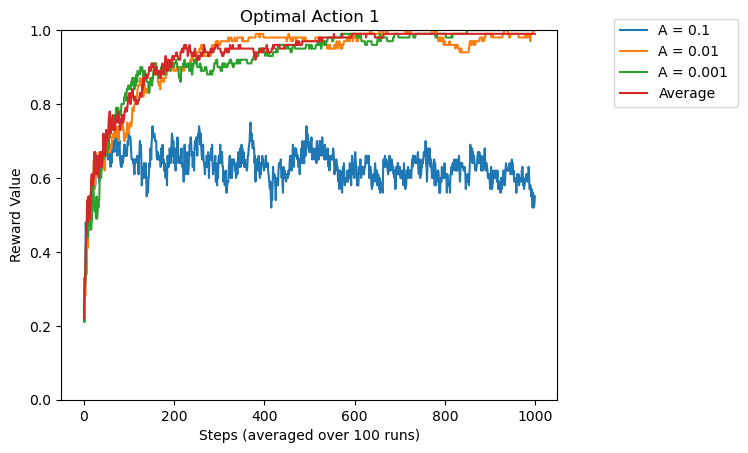

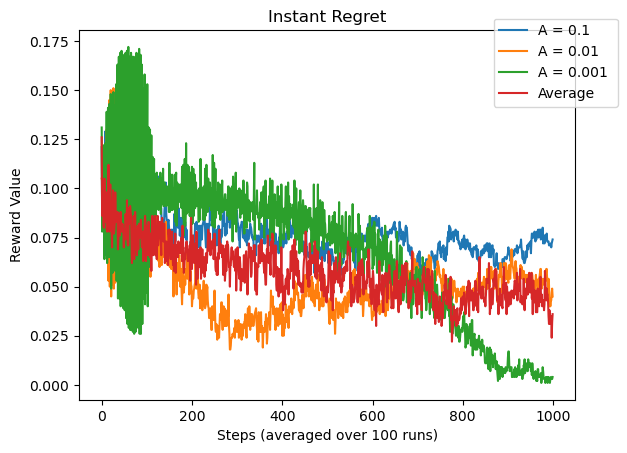

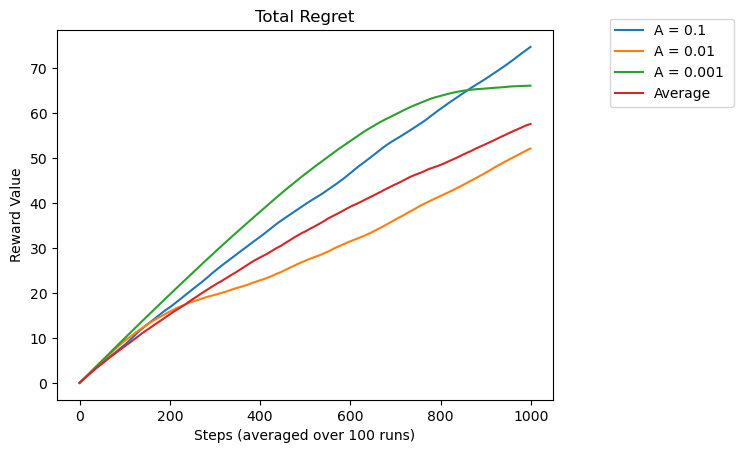

In [13]:
UCB_one_eight_alpha_1 = main(0.1,1000,100,1/8,1)

UCB_one_eight_alpha_2 = main(0.01,1000,100,1/8,1)

UCB_one_eight_alpha_3 = main(0.001,1000,100,1/8,1)

UCB_one_four_alpha_1 = main(0.1,1000,100,1/4,0)


range_vals = np.arange(0,1000,1)
plt.plot(range_vals,UCB_one_eight_alpha_1[0], label = "A = 0.1 ") 
plt.plot(range_vals,UCB_one_eight_alpha_2[0], label = "A = 0.01 ")
plt.plot(range_vals,UCB_one_eight_alpha_3[0], label = "A = 0.001 ")
plt.plot(range_vals,UCB_one_four_alpha_1[0], label = "Average")

plt.plot(range_vals,UCB_one_eight_alpha_1[4], label = "Standard Error A = 0.1 ") 
plt.plot(range_vals,UCB_one_eight_alpha_2[4], label = "Standard Error A = 0.01 ")
plt.plot(range_vals,UCB_one_eight_alpha_3[4], label = "Standard Error A = 0.001 ")
plt.plot(range_vals,UCB_one_four_alpha_1[4], label = "Standard Error Average")
'''plt.plot(range_vals,one_four_alpha_2[0], label = "E = 1/4 and A = 0.01 ")
plt.plot(range_vals,one_four_alpha_3[0], label = "E = 1/4 and A = 0.001 ")'''

#plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Averaging Reward")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

plt.plot(range_vals,UCB_one_eight_alpha_1[1], label = "A = 0.1 ") 
plt.plot(range_vals,UCB_one_eight_alpha_2[1], label = "A = 0.01 ")
plt.plot(range_vals,UCB_one_eight_alpha_3[1], label = "A = 0.001 ")
plt.plot(range_vals,UCB_one_four_alpha_1[1], label = "Average")
'''plt.plot(range_vals,one_four_alpha_2[1], label = "E = 1/4 and A = 0.01 ")
plt.plot(range_vals,one_four_alpha_3[1], label = "E = 1/4 and A = 0.001 ")'''

plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Optimal Action 1")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

plt.plot(range_vals,UCB_one_eight_alpha_1[2], label = "A = 0.1 ") 
plt.plot(range_vals,UCB_one_eight_alpha_2[2], label = "A = 0.01 ")
plt.plot(range_vals,UCB_one_eight_alpha_3[2], label = "A = 0.001 ")
plt.plot(range_vals,UCB_one_four_alpha_1[2], label = "Average")
'''plt.plot(range_vals,one_four_alpha_1[2], label = "E = 1/4 and A = 0.1 ")
plt.plot(range_vals,one_four_alpha_2[2], label = "E = 1/4 and A = 0.01 ")
plt.plot(range_vals,one_four_alpha_3[2], label = "E = 1/4 and A = 0.001 ")'''

#plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Instant Regret")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

plt.plot(range_vals,UCB_one_eight_alpha_1[3], label = "A = 0.1 ") 
plt.plot(range_vals,UCB_one_eight_alpha_2[3], label = "A = 0.01 ")
plt.plot(range_vals,UCB_one_eight_alpha_3[3], label = "A = 0.001 ")
plt.plot(range_vals,UCB_one_four_alpha_1[3], label = "Average")
'''plt.plot(range_vals,one_four_alpha_1[3], label = "E = 1/4 and A = 0.1 ")
plt.plot(range_vals,one_four_alpha_2[3], label = "E = 1/4 and A = 0.01 ")
plt.plot(range_vals,one_four_alpha_3[3], label = "E = 1/4 and A = 0.001 ")'''

#plt.ylim([0, 1])
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Total Regret")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()


This shows an interesting result where a higher alpha can actually decrease the optimal action determination. This is due to the fact that since alpha 0.1 has a higher step size it can change the estimated value faster (when the bernoulli returns 0 so the expectation of the reward drops). This can help accelerate the rise of the UCB of the inferior arms from overpassing arm 0 (which is the most optimal action). This means that the Q of arm one drops below the sum of the Q + Csqrt(ln(t)/N) of the other arms (arm 0 has a very small Csqrt(ln(t)/N) due to high sampling). Therefore Alpha 0.001 is best since the negative steps (when reward received is 0) is lower.  (I am not entirely sure for the initial variance in the Instant Regret plot for Alpha = 0.001)

## Problem 7

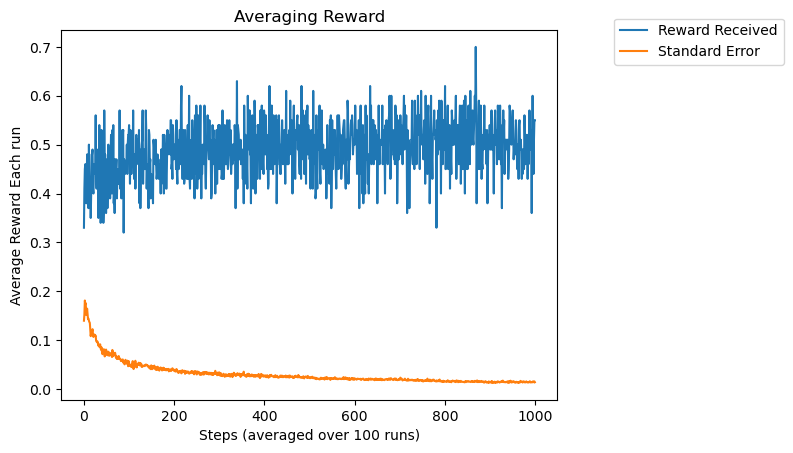

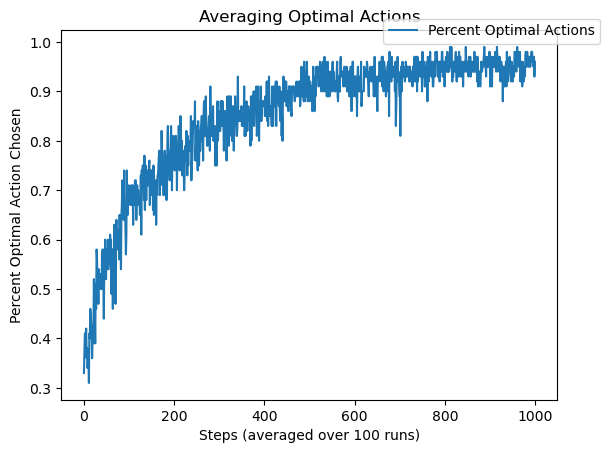

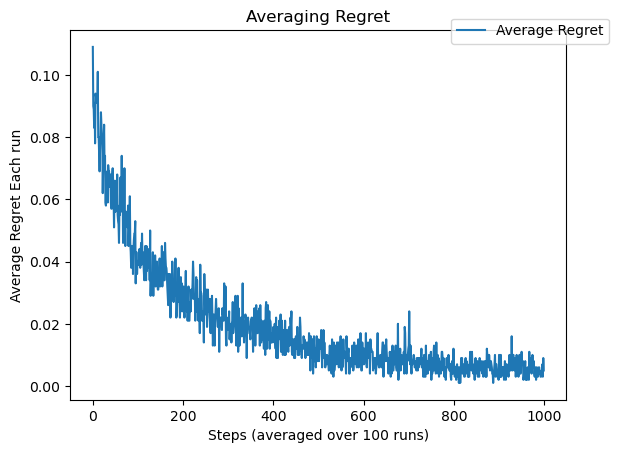

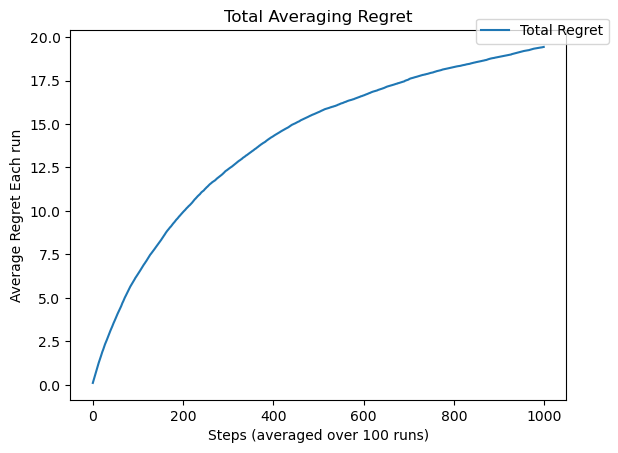

In [14]:
def main(trial_number,runs):
  proba_values = np.array([0.5,0.4,0.3])
  true_value = np.array([0.5,0.4,0.3])
  
  run_preaveraged_reward = [1 for x in range(trial_number)]

  estimated_is_best = [0 for x in range(trial_number)]

  instant_regret = [0 for x in range(trial_number)]
  total_regret = [0 for x in range(trial_number)]
  run_preaveraged_se = [0 for x in range(trial_number)]

  for k in range(runs):
    val = []
    arm_0 = [1,1,0]
    arm_1 = [1,1,0]
    arm_2 = [1,1,0]
    
    for j in range(trial_number):
      beta_0 = np.random.beta(arm_0[0],arm_0[1])
      beta_1 = np.random.beta(arm_1[0],arm_1[1])
      beta_2 = np.random.beta(arm_2[0],arm_2[1])

      if beta_0 >= beta_1 and beta_0 >= beta_2:
        data_bern = bernoulli.rvs(size=1,p=proba_values[0])
        arm_0[0] += data_bern[0]
        arm_0[1] += 1-data_bern[0]
        arm_0[2] += 1
        run_preaveraged_se[j] += (abs(true_value[0] - arm_0[0]/(arm_0[0]+arm_0[1]))) #for standard error
        val.append(arm_0[0]/(arm_0[0]+ arm_0[1]))
        if j == 0:
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[0] - true_value[0]
        else: 
          #run_preaveraged_reward[j] += run_preaveraged_reward[j-1]
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[0] - true_value[0] + total_regret[j-1]
        estimated_is_best[j] += 1
        instant_regret[j] += true_value[0] - true_value[0]
      elif beta_1 >= beta_0 and beta_1 >= beta_2:
        data_bern = bernoulli.rvs(size=1,p=proba_values[1])
        arm_1[0] += data_bern[0]
        arm_1[1] += 1-data_bern[0]
        arm_1[2] += 1
        run_preaveraged_se[j] += (abs(true_value[1] - arm_1[0]/(arm_1[0]+arm_1[1]))) #for standard error
        val.append(arm_0[0]/(arm_0[0]+ arm_0[1]))
        if j == 0:
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[0] - true_value[0]
        else: 
          #run_preaveraged_reward[j] += run_preaveraged_reward[j-1]
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[0] - true_value[1] + total_regret[j-1]
        instant_regret[j] += true_value[0] - true_value[1]
      elif beta_2 >= beta_0 and beta_2 >= beta_1:
        data_bern = bernoulli.rvs(size=1,p=proba_values[2])
        arm_2[0] += data_bern[0]
        arm_2[1] += 1-data_bern[0]
        arm_2[2] += 1
        run_preaveraged_se[j] += (abs(true_value[2] - arm_2[0]/(arm_2[0]+arm_2[1]))) #for standard error
        val.append(arm_0[0]/(arm_0[0]+ arm_0[1]))
        if j == 0:
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[0] - true_value[0]
        else: 
          #run_preaveraged_reward[j] += run_preaveraged_reward[j-1]
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[0] - true_value[2] + total_regret[j-1]
        instant_regret[j] += true_value[0] - true_value[2]
    #print(arm_0,arm_1,arm_2)

    #run_preaveraged_se[k] = stats.sem(val, axis=None, ddof=0)
    r = beta.rvs(arm_0[0], arm_0[1], size=1000)
    r1 = beta.rvs(arm_1[0], arm_1[1], size=1000)
    r2 = beta.rvs(arm_2[0], arm_2[1], size=1000)
  for itter in range(trial_number):
    run_preaveraged_se[itter] = run_preaveraged_se[itter]/runs 
    estimated_is_best[itter] = estimated_is_best[itter]/runs
  range_vals = np.arange(0,trial_number,1)
  

  for itter in range(trial_number):
      run_preaveraged_reward[itter] = run_preaveraged_reward[itter]/runs

  
  range_vals = np.arange(0,trial_number,1)
  plt.plot(range_vals,run_preaveraged_reward, label = "Reward Received")
  plt.plot(range_vals,run_preaveraged_se, label = "Standard Error")
  
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.title("Averaging Reward")
  plt.xlabel("Steps (averaged over 100 runs)")
  plt.ylabel("Average Reward Each run")
  plt.show()

  plt.plot(range_vals,estimated_is_best, label = "Percent Optimal Actions")
  
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.title("Averaging Optimal Actions")
  plt.xlabel("Steps (averaged over 100 runs)")
  plt.ylabel("Percent Optimal Action Chosen")
  plt.show()
  
  for itter in range(trial_number):
      instant_regret[itter] = instant_regret[itter]/runs
  range_vals = np.arange(0,trial_number,1)
  plt.plot(range_vals,instant_regret, label = "Average Regret")
  
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.title("Averaging Regret")
  plt.xlabel("Steps (averaged over 100 runs)")
  plt.ylabel("Average Regret Each run")
  plt.show()

  for itter in range(trial_number):
    if itter == 0:
      total_regret[itter] = instant_regret[itter]
    else:
      total_regret[itter] = instant_regret[itter] + total_regret[itter-1]
  range_vals = np.arange(0,trial_number,1)
  plt.plot(range_vals,total_regret, label = "Total Regret")
  
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.title("Total Averaging Regret")
  plt.xlabel("Steps (averaged over 100 runs)")
  plt.ylabel("Average Regret Each run")
  plt.show()

  return [run_preaveraged_reward,run_preaveraged_se,estimated_is_best,instant_regret,total_regret]

Tompson = main(1000,100)

The Thompson sampling method is shown to work as it worked in class. As the time steps move on the exploration shows which is the optimal reward. Regret drops over time and the total regret is sub linear. 

## Problem 8

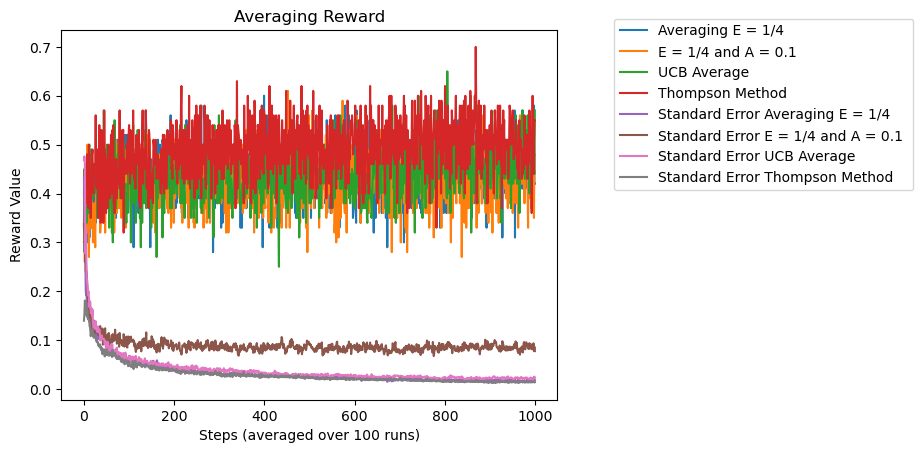

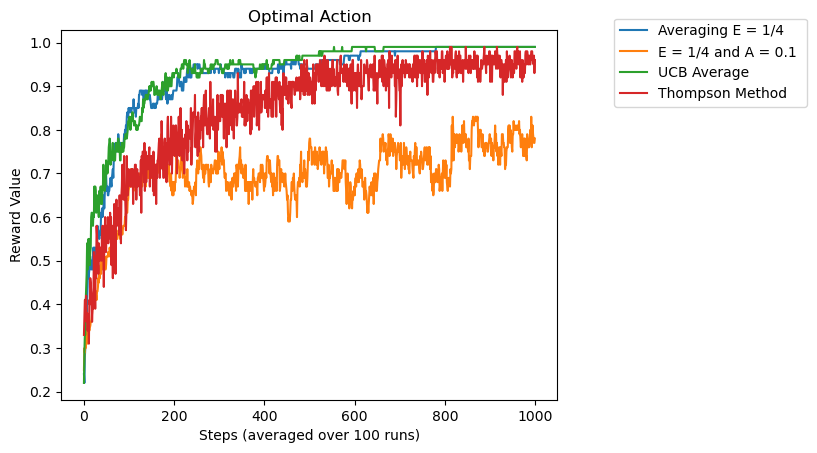

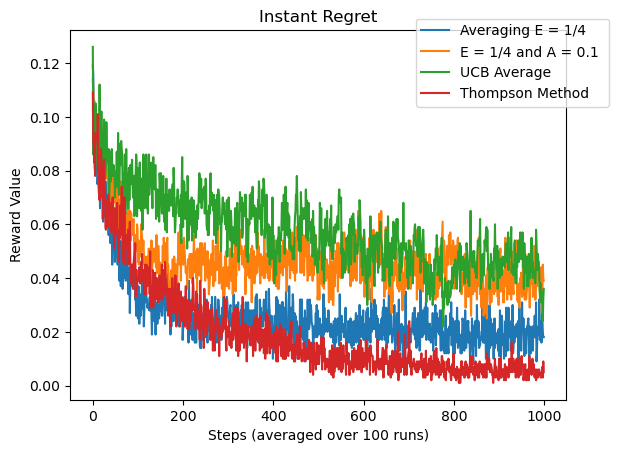

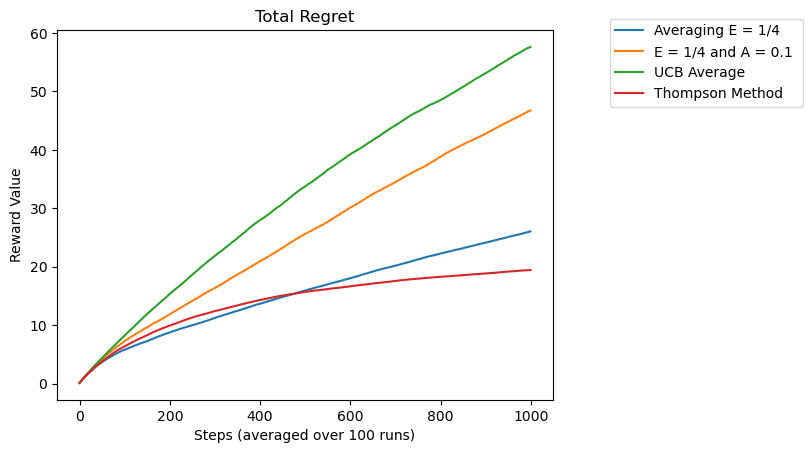

In [15]:
range_vals = np.arange(0,1000,1)
plt.plot(range_vals,one_four[0], label = "Averaging E = 1/4 ") 
plt.plot(range_vals,one_four_alpha_1[0], label = "E = 1/4 and A = 0.1 ") 
plt.plot(range_vals,UCB_one_four_alpha_1[0], label = "UCB Average")
plt.plot(range_vals,Tompson[0], label = "Thompson Method") 

plt.plot(range_vals,one_four[4], label = "Standard Error Averaging E = 1/4 ") 
plt.plot(range_vals,one_four_alpha_1[4], label = "Standard Error E = 1/4 and A = 0.1 ") 
plt.plot(range_vals,UCB_one_four_alpha_1[4], label = "Standard Error UCB Average") 
plt.plot(range_vals,Tompson[1], label = "Standard Error Thompson Method") 
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Averaging Reward")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

range_vals = np.arange(0,1000,1)
plt.plot(range_vals,one_four[1], label = "Averaging E = 1/4 ") 
plt.plot(range_vals,one_four_alpha_1[1], label = "E = 1/4 and A = 0.1 ") 
plt.plot(range_vals,UCB_one_four_alpha_1[1], label = "UCB Average") 
plt.plot(range_vals,Tompson[2], label = "Thompson Method") 
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Optimal Action")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

range_vals = np.arange(0,1000,1)
plt.plot(range_vals,one_four[2], label = "Averaging E = 1/4 ") 
plt.plot(range_vals,one_four_alpha_1[2], label = "E = 1/4 and A = 0.1 ") 
plt.plot(range_vals,UCB_one_four_alpha_1[2], label = "UCB Average") 
plt.plot(range_vals,Tompson[3], label = "Thompson Method") 
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Instant Regret")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()

range_vals = np.arange(0,1000,1)
plt.plot(range_vals,one_four[3], label = "Averaging E = 1/4 ") 
plt.plot(range_vals,one_four_alpha_1[3], label = "E = 1/4 and A = 0.1 ") 
plt.plot(range_vals,UCB_one_four_alpha_1[3], label = "UCB Average") 
plt.plot(range_vals,Tompson[4], label = "Thompson Method") 
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Total Regret")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()


These are the best of each of the different Multi Armed Bandit Algorithm (1. Epsilon Averaging, 2. Gradient Decent, 3. UCB). They are all sublenear algorithms. While Epsilon Averaging wins in the regret category the UCB algorithm wins the Optimality. The gradient decent method is a middle ground between the two. When determining which algorithm to pick a balance must be made between two effective factors: regret and time until max optimality is reached (these two factors play into reward). The gradient descent with E=1/4 and Alpha = 0.1 was the best due to the fact it has high exploration (while not being too high) and high step size  (see problem 5 plots). In an ideal world a decrease in step size and exploration woudl be best given a non stationary situation. The averaging was best with epsilon = 1/4 because again it has good exploration without being too high (see problem 4 plots). The UCB method with averaging was the best because it had the least issue result from step size and its standard error dropped the fastest (of the UCB methods) (see problem 6 plots).

## Problem 9


In this section modified versions of the problem 1-8 scripts were taken and the non stationary effect was added.

Epsilon

In [16]:
def maxpos(return_list):
  pos = [index for index, item in enumerate(return_list) if item == max(return_list)]
  if len(pos) > 1:
    rand = random.randint(0, len(pos))
    return pos[rand-1]
  else:
    return pos[0]

def update(alpha,current_estimate,reward):
  return current_estimate + alpha * (reward-current_estimate)

def updateAvg(alpha,data_cum,steps):
  return ((data_cum)/steps)

def updateAvg_plots(range_vals,data_bern,list_average,true_np,arm_number,error):
  plt.scatter(range_vals,data_bern, label = "Reward Received") 
  plt.scatter(range_vals,list_average, label = "Average Reward Received")
  plt.scatter(range_vals,true_np, label = "True Received")
  plt.scatter(range_vals,error, label = "Error")
  
  plt.legend()
  plt.title("Averaging Method Arm " + str(arm_number) + " Plots")
  plt.xlabel("Runs")
  plt.ylabel("Reward Value")
  plt.show()

def update_plots(range_vals,data_bern,list_average,true_np,arm_number,error):
  plt.scatter(range_vals,data_bern, label = "Reward Received") 
  plt.scatter(range_vals,list_average, label = "Average Reward Received")
  plt.scatter(range_vals,true_np, label = "True Received")
  plt.scatter(range_vals,error, label = "Error")
  
  plt.legend()
  plt.title("Alpha Method Arm " + str(arm_number) + " Plots")
  plt.xlabel("Runs")
  plt.ylabel("Reward Value")
  plt.show()

def main_ep_alpha_9(alpha,trials,multi,epsilon,toggle):
  
  run_preaveraged_reward = [0 for x in range(trials)]
  run_preaveraged_best = [0 for x in range(trials)]
  
  run_preaveraged_instant_regret = [0 for x in range(trials)]
  run_preaveraged_total_regret = [0 for x in range(trials)]
  
  proba_values = np.array([0.5,0.4,0.3])
  true_value = np.array([0.5,0.4,0.3])
  trial_number = trials
  range_vals = np.arange(0,trial_number+1,1)
  multi_range_vals = np.arange(0,multi,1)
  total_average_error = [[],[],[]]
  total_update_error = [[],[],[]]
  total_average = [[],[],[]]
  total_update = [[],[],[]]
  total_reward = []

  avg_inst_regret = []
  avg_total_regret = []
  run_preaveraged_se = [0 for x in range(trials)]
  for k in range(multi):
    proba_values = np.array([0.5,0.4,0.3])
    true_value = np.array([0.5,0.4,0.3])
    best = 0
    val = []
    end_reward = 0
  
    list_average = [[0],[0],[0]]
    list_update = [[0],[0],[0]]
    average_error = [[],[],[]]
    update_error = [[],[],[]]

    average_use = [[0],[0],[0]]
    update_use = [[0],[0],[0]]

    instant_regret = 0

    success_history = [[],[],[]]


    for j in range(trial_number):
      if j > 500:
        proba_values = np.array([0.5,0.6,0.7])
        true_value = np.array([0.5,0.6,0.7])
        best = 2
      rand = random.uniform(0,1)
      if toggle == 0:
        
        tmppick = maxpos([list_average[0][-1],list_average[1][-1],list_average[2][-1]])
        if tmppick == best:
          run_preaveraged_best[j] += 1
        if rand < epsilon:
          avgpick = random.randint(0, 3)
        else:
          avgpick = maxpos([list_average[0][-1],list_average[1][-1],list_average[2][-1]])
        for l in range(3):
          if l == avgpick:
            average_use[avgpick][0] += 1
            data_bern = bernoulli.rvs(size=1,p=proba_values[avgpick])
            end_reward += data_bern[0]
            returned = (updateAvg(alpha,(average_use[avgpick][0]-1)*list_average[avgpick][-1]+ data_bern[0],average_use[avgpick][0]))
            val.append(returned)
          
            list_average[l].append(returned)
            instant_regret += true_value[best] - true_value[l]

            run_preaveraged_instant_regret[j] += true_value[best] - true_value[l]
            run_preaveraged_reward[j] += data_bern[0]
            run_preaveraged_se[j] += (abs(true_value[avgpick] - returned)) #for standard error
          else:
            list_average[l].append(list_average[l][-1])
        
        if j == trial_number - 1:
          avg_inst_regret.append(instant_regret/trial_number)
          avg_total_regret.append(instant_regret)
          total_average[0].append(list_average[0][-1])
          total_average[1].append(list_average[1][-1])
          total_average[2].append(list_average[2][-1])
      
      elif toggle == 1:
        tmppick = maxpos([list_update[0][-1],list_update[1][-1],list_update[2][-1]])
        if tmppick == best:
          run_preaveraged_best[j] += 1
        if rand < epsilon:
          avgpick = random.randint(0, 3)
        else:
          avgpick = maxpos([list_update[0][-1],list_update[1][-1],list_update[2][-1]])
        for l in range(3):
          if l == avgpick:
            average_use[avgpick][0] += 1
            data_bern = bernoulli.rvs(size=1,p=proba_values[avgpick])
            #update(alpha,current_estimate,reward):
            returned = update(alpha,list_update[avgpick][-1],data_bern[0])
            val.append(returned)
          
            list_update[l].append(returned)
            end_reward += data_bern[0]
            instant_regret += true_value[best] - true_value[l]
            success_history[l].append(data_bern[0])
            run_preaveraged_se[j] += (abs(true_value[avgpick] - returned)) #for standard error
            run_preaveraged_instant_regret[j] += true_value[best] - true_value[l]

            run_preaveraged_reward[j] += data_bern[0]
          else:
            list_update[l].append(list_update[l][-1])
        if j == trial_number - 1:
          avg_inst_regret.append(instant_regret/trial_number)
          avg_total_regret.append(instant_regret)
          total_average[0].append(list_update[0][-1])
          total_average[1].append(list_update[1][-1])
          total_average[2].append(list_update[2][-1])
          total_reward.append(end_reward/trial_number)
    #run_preaveraged_se[k] = stats.sem(val, axis=None, ddof=0)
  for itter in range(trial_number):
    run_preaveraged_reward[itter] = run_preaveraged_reward[itter]/multi
    run_preaveraged_se[itter] = run_preaveraged_se[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_best[itter] = run_preaveraged_best[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_instant_regret[itter] = run_preaveraged_instant_regret[itter]/multi

  for itter in range(trial_number):
    if itter == 0:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter]
    else:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter] + run_preaveraged_total_regret[itter-1]


  return [run_preaveraged_reward,run_preaveraged_best,run_preaveraged_instant_regret,run_preaveraged_total_regret,run_preaveraged_se]


In [17]:
one_eight = main_ep_alpha_9(0.1,1000,100,1/8,0)

one_eight_alpha_1 = main_ep_alpha_9(0.1,1000,100,1/8,1)

one_four = main_ep_alpha_9(0.1,1000,100,1/4,0)

one_four_alpha_1 = main_ep_alpha_9(0.1,1000,100,1/4,1)

UCB

In [18]:
def UCB_method(estimate,usage,constant,size):
  currentmax = 0
  maxpos = 0
  total_usage = np.sum(usage)
  for i in range(size):
    current = estimate[i]+constant*math.sqrt(math.log(total_usage+1)/(usage[i]+0.0000001))
    if current > currentmax:
      maxpos = i
      currentmax = current
    elif current == currentmax:
      rand = random.randint(0,1)
      if rand == 1:
        maxpos = i
        currentmax = current
  return maxpos

def maxpos(return_list):
  pos = [index for index, item in enumerate(return_list) if item == max(return_list)]
  if len(pos) > 1:
    rand = random.randint(0, len(pos))
    return pos[rand-1]
  else:
    return pos[0]

def update(alpha,current_estimate,reward):
  return current_estimate + alpha * (reward-current_estimate)

def updateAvg(alpha,data_cum,steps):
  return ((data_cum)/steps)

def updateAvg_plots(range_vals,data_bern,list_average,true_np,arm_number,error):
  plt.scatter(range_vals,data_bern, label = "Reward Received") 
  plt.scatter(range_vals,list_average, label = "Average Reward Received")
  plt.scatter(range_vals,true_np, label = "True Received")
  plt.scatter(range_vals,error, label = "Error")
  
  plt.legend()
  plt.title("Averaging Method Arm " + str(arm_number) + " Plots")
  plt.xlabel("Runs")
  plt.ylabel("Reward Value")
  plt.show()

def update_plots(range_vals,data_bern,list_average,true_np,arm_number,error):
  plt.scatter(range_vals,data_bern, label = "Reward Received") 
  plt.scatter(range_vals,list_average, label = "Average Reward Received")
  plt.scatter(range_vals,true_np, label = "True Received")
  plt.scatter(range_vals,error, label = "Error")
  
  plt.legend()
  plt.title("Alpha Method Arm " + str(arm_number) + " Plots")
  plt.xlabel("Runs")
  plt.ylabel("Reward Value")
  plt.show()

def main_UCB_9(alpha,trials,multi,epsilon,toggle):
  
  run_preaveraged_reward = [0 for x in range(trials)]
  run_preaveraged_best = [0 for x in range(trials)]
  
  run_preaveraged_instant_regret = [0 for x in range(trials)]
  run_preaveraged_total_regret = [0 for x in range(trials)]
  
  
  trial_number = trials
  range_vals = np.arange(0,trial_number+1,1)
  multi_range_vals = np.arange(0,multi,1)
  total_average_error = [[],[],[]]
  total_update_error = [[],[],[]]
  total_average = [[],[],[]]
  total_update = [[],[],[]]
  total_reward = []

  avg_inst_regret = []
  avg_total_regret = []
  run_preaveraged_se = [0 for x in range(trials)]
  for k in range(multi):
    proba_values = np.array([0.5,0.4,0.3])
    true_value = np.array([0.5,0.4,0.3])
    best = 0
    val = []
    end_reward = 0
  
    list_average = [[0],[0],[0]]
    list_update = [[0],[0],[0]]
    average_error = [[],[],[]]
    update_error = [[],[],[]]

    average_use = [[0],[0],[0]]
    update_use = [[0],[0],[0]]

    instant_regret = 0

    success_history = [[],[],[]]


    for j in range(trial_number):
      if j > 500:
        proba_values = np.array([0.5,0.6,0.7])
        true_value = np.array([0.5,0.6,0.7])
        best = 2
      rand = random.uniform(0,1)
      if toggle == 0:
        
        tmppick = maxpos([list_average[0][-1],list_average[1][-1],list_average[2][-1]])
        if tmppick == best:
          run_preaveraged_best[j] += 1
        avgpick = UCB_method([list_average[0][-1],list_average[1][-1],list_average[2][-1]],[average_use[0][-1],average_use[1][-1],average_use[2][-1]],2,3)
        #print("output: ",avgpick)
        
        #UCB_method(estimate,usage,constant,size):
        for l in range(3):
          if l == avgpick:
            average_use[avgpick][0] += 1
            data_bern = bernoulli.rvs(size=1,p=proba_values[avgpick])
            end_reward += data_bern[0]
            returned = (updateAvg(alpha,(average_use[avgpick][0]-1)*list_average[avgpick][-1]+ data_bern[0],average_use[avgpick][0]))
            list_average[l].append(returned)
            instant_regret += true_value[best] - true_value[l]
            val.append(returned)
            run_preaveraged_se[j] += (abs(true_value[avgpick] - returned)) #for standard error
            run_preaveraged_instant_regret[j] += true_value[best] - true_value[l]
            run_preaveraged_reward[j] += data_bern[0]
          else:
            list_average[l].append(list_average[l][-1])
        
        if j == trial_number - 1:
          
          #run_preaveraged_se[k] = stats.sem(val, axis=None, ddof=0)
          avg_inst_regret.append(instant_regret/trial_number)
          avg_total_regret.append(instant_regret)
          total_average[0].append(list_average[0][-1])
          total_average[1].append(list_average[1][-1])
          total_average[2].append(list_average[2][-1])
        #print("average: ",[list_average[0][-1],list_average[1][-1],list_average[2][-1]])
      
      elif toggle == 1:
        tmppick = maxpos([list_update[0][-1],list_update[1][-1],list_update[2][-1]])
        if tmppick == best:
          run_preaveraged_best[j] += 1
        avgpick = UCB_method([list_update[0][-1],list_update[1][-1],list_update[2][-1]],[average_use[0][-1],average_use[1][-1],average_use[2][-1]],2,3)
        
        for l in range(3):
          if l == avgpick:
            average_use[avgpick][0] += 1
            data_bern = bernoulli.rvs(size=1,p=proba_values[avgpick])
            #update(alpha,current_estimate,reward):
            returned = update(alpha,list_update[avgpick][-1],data_bern[0])
            list_update[l].append(returned)
            end_reward += data_bern[0]
            instant_regret += true_value[best] - true_value[l]
            success_history[l].append(data_bern[0])
            
            run_preaveraged_instant_regret[j] += true_value[best] - true_value[l]
            run_preaveraged_se[j] += (abs(true_value[avgpick] - returned)) #for standard error
            run_preaveraged_reward[j] += data_bern[0]
            val.append(returned)
          else:
            list_update[l].append(list_update[l][-1])
        if j == trial_number - 1:
          #run_preaveraged_se[k] = stats.sem(val, axis=None, ddof=0)
          avg_inst_regret.append(instant_regret/trial_number)
          avg_total_regret.append(instant_regret)
          total_average[0].append(list_update[0][-1])
          total_average[1].append(list_update[1][-1])
          total_average[2].append(list_update[2][-1])
          total_reward.append(end_reward/trial_number)

  for itter in range(trial_number):
    run_preaveraged_reward[itter] = run_preaveraged_reward[itter]/multi
    run_preaveraged_se[itter] = run_preaveraged_se[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_best[itter] = run_preaveraged_best[itter]/multi

  for itter in range(trial_number):
    run_preaveraged_instant_regret[itter] = run_preaveraged_instant_regret[itter]/multi

  for itter in range(trial_number):
    if itter == 0:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter]
    else:
      run_preaveraged_total_regret[itter] = run_preaveraged_instant_regret[itter] + run_preaveraged_total_regret[itter-1]


  return [run_preaveraged_reward,run_preaveraged_best,run_preaveraged_instant_regret,run_preaveraged_total_regret,run_preaveraged_se]




In [19]:
UCB_one_four_alpha_1 = main_UCB_9(0.1,1000,100,1/4,1)

UCB_one_four = main_UCB_9(0.1,1000,100,1/4,0)

Thompson

In [20]:
def main(trial_number,runs):
  proba_values = np.array([0.5,0.4,0.3])
  true_value = np.array([0.5,0.4,0.3])
  best = 0
  
  run_preaveraged_reward = [1 for x in range(trial_number)]

  estimated_is_best = [0 for x in range(trial_number)]

  instant_regret = [0 for x in range(trial_number)]
  total_regret = [0 for x in range(trial_number)]
  run_preaveraged_se = [0 for x in range(trial_number)]

  for k in range(runs):
    proba_values = np.array([0.5,0.4,0.3])
    true_value = np.array([0.5,0.4,0.3])
    best = 0
    val = []
    arm_0 = [1,1,0]
    arm_1 = [1,1,0]
    arm_2 = [1,1,0]
    
    for j in range(trial_number):
      if j > 500:
        proba_values = np.array([0.5,0.6,0.7])  
        true_value = np.array([0.5,0.6,0.7])
        best = 2
      beta_0 = np.random.beta(arm_0[0],arm_0[1])
      beta_1 = np.random.beta(arm_1[0],arm_1[1])
      beta_2 = np.random.beta(arm_2[0],arm_2[1])

      if beta_0 >= beta_1 and beta_0 >= beta_2:
        data_bern = bernoulli.rvs(size=1,p=proba_values[0])
        arm_0[0] += data_bern[0]
        arm_0[1] += 1-data_bern[0]
        arm_0[2] += 1
        run_preaveraged_se[j] += (abs(true_value[0] - arm_0[0]/(arm_0[0]+arm_0[1]))) #for standard error
        val.append(arm_0[0]/(arm_0[0]+ arm_0[1]))
        if j == 0:
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[0] - true_value[0]
        else: 
          #run_preaveraged_reward[j] += run_preaveraged_reward[j-1]
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[best] - true_value[0] + total_regret[j-1]
        if j <= 500:
          estimated_is_best[j] += 1
        instant_regret[j] += true_value[best] - true_value[0]
      elif beta_1 >= beta_0 and beta_1 >= beta_2:
        data_bern = bernoulli.rvs(size=1,p=proba_values[1])
        arm_1[0] += data_bern[0]
        arm_1[1] += 1-data_bern[0]
        arm_1[2] += 1
        run_preaveraged_se[j] += (abs(true_value[1] - arm_1[0]/(arm_1[0]+arm_1[1]))) #for standard error
        val.append(arm_0[0]/(arm_0[0]+ arm_0[1]))
        if j == 0:
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[0] - true_value[0]
        else: 
          #run_preaveraged_reward[j] += run_preaveraged_reward[j-1]
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[best] - true_value[1] + total_regret[j-1]
        instant_regret[j] += true_value[best] - true_value[1]
      elif beta_2 >= beta_0 and beta_2 >= beta_1:
        data_bern = bernoulli.rvs(size=1,p=proba_values[2])
        arm_2[0] += data_bern[0]
        arm_2[1] += 1-data_bern[0]
        arm_2[2] += 1
        run_preaveraged_se[j] += (abs(true_value[2] - arm_2[0]/(arm_2[0]+arm_2[1]))) #for standard error
        val.append(arm_0[0]/(arm_0[0]+ arm_0[1]))
        if j == 0:
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[0] - true_value[0]
        else: 
          #run_preaveraged_reward[j] += run_preaveraged_reward[j-1]
          run_preaveraged_reward[j] += data_bern[0]
          total_regret[j] += true_value[best] - true_value[2] + total_regret[j-1]
        instant_regret[j] += true_value[best] - true_value[2]
        if j > 500:
          estimated_is_best[j] += 1
    #print(arm_0,arm_1,arm_2)

    #run_preaveraged_se[k] = stats.sem(val, axis=None, ddof=0)
    r = beta.rvs(arm_0[0], arm_0[1], size=1000)
    r1 = beta.rvs(arm_1[0], arm_1[1], size=1000)
    r2 = beta.rvs(arm_2[0], arm_2[1], size=1000)
  for itter in range(trial_number):
    run_preaveraged_se[itter] = run_preaveraged_se[itter]/runs 
    estimated_is_best[itter] = estimated_is_best[itter]/runs
  range_vals = np.arange(0,trial_number,1)
  '''plt.plot(range_vals,estimated_is_best, label = "Percent Optimal Actions")
  
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.title("Averaging Optimal Actions")
  plt.xlabel("Steps (averaged over 100 runs)")
  plt.ylabel("Percent Optimal Action Chosen")
  plt.show()'''

  for itter in range(trial_number):
      run_preaveraged_reward[itter] = run_preaveraged_reward[itter]/runs
  range_vals = np.arange(0,trial_number,1)
  '''plt.plot(range_vals,run_preaveraged_reward, label = "Reward Received")
  plt.plot(range_vals,run_preaveraged_se, label = "Standard Error")
  
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.title("Averaging Reward")
  plt.xlabel("Steps (averaged over 100 runs)")
  plt.ylabel("Average Reward Each run")
  plt.show()'''

  for itter in range(trial_number):
      instant_regret[itter] = instant_regret[itter]/runs
  range_vals = np.arange(0,trial_number,1)
  '''plt.plot(range_vals,instant_regret, label = "Average Regret")
  
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.title("Averaging Regret")
  plt.xlabel("Steps (averaged over 100 runs)")
  plt.ylabel("Average Regret Each run")
  plt.show()'''

  for itter in range(trial_number):
    if itter == 0:
      total_regret[itter] = instant_regret[itter]
    else:
      total_regret[itter] = instant_regret[itter] + total_regret[itter-1]
  range_vals = np.arange(0,trial_number,1)
  '''plt.plot(range_vals,total_regret, label = "Total Regret")
  
  plt.legend(bbox_to_anchor=(1.1, 1.05))
  plt.title("Total Averaging Regret")
  plt.xlabel("Steps (averaged over 100 runs)")
  plt.ylabel("Average Regret Each run")
  plt.show()'''

  return [run_preaveraged_reward,run_preaveraged_se]

Tompson_9 = main(1000,100)

Final Results

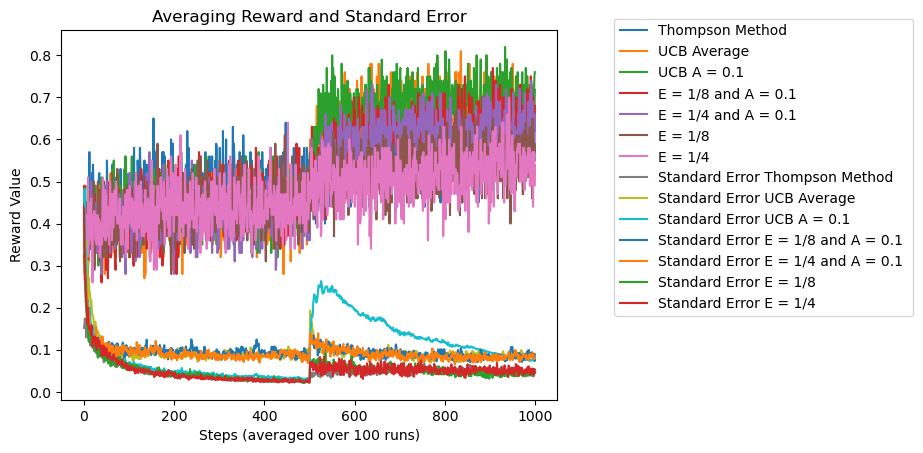

In [21]:
range_vals = np.arange(0,1000,1)
plt.plot(range_vals,Tompson_9[0], label = "Thompson Method")
plt.plot(range_vals,UCB_one_four_alpha_1[0], label = "UCB Average") 
plt.plot(range_vals,UCB_one_four[0], label = "UCB A = 0.1") 
plt.plot(range_vals,one_eight_alpha_1[0], label = "E = 1/8 and A = 0.1 ") 
plt.plot(range_vals,one_four_alpha_1[0], label = "E = 1/4 and A = 0.1 ")
plt.plot(range_vals,one_eight[0], label = "E = 1/8")
plt.plot(range_vals,one_four[0], label = "E = 1/4")

plt.plot(range_vals,Tompson_9[1], label = "Standard Error Thompson Method")
plt.plot(range_vals,UCB_one_four_alpha_1[4], label = "Standard Error UCB Average") 
plt.plot(range_vals,UCB_one_four[4], label = "Standard Error UCB A = 0.1") 
plt.plot(range_vals,one_eight_alpha_1[4], label = "Standard Error E = 1/8 and A = 0.1 ") 
plt.plot(range_vals,one_four_alpha_1[4], label = "Standard Error E = 1/4 and A = 0.1 ")
plt.plot(range_vals,one_eight[4], label = "Standard Error E = 1/8")
plt.plot(range_vals,one_four[4], label = "Standard Error E = 1/4")

plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("Averaging Reward and Standard Error")
plt.xlabel("Steps (averaged over 100 runs)")
plt.ylabel("Reward Value")
plt.show()



The UCB and Gradient Methods seem to be the best methods to adapt when the rewards change in a non stationary situation. The UCB method benefits from the higher valued C (c = 2). If the value of C was lower then the updating speed for the method would be lower. The gradient method works well since the alpha value is relatively high (for the case of alpha = 0.1) especially with the epsilon of 1/4. This means it randomly frequently and takes large steps. The Thompson and averaging method is slow at updating because they both use averages. This means as more values are averaged over the slower the updating happens. Thompson averages bernoulli between success and failures so after 500 steps this is slow to update. The straight average method is also slow to update for the same reason.